# NADILA IMAARAH / 2 D4 SAINS DATA TERAPAN A

# **WEEK 5 Evaluation Model Unsupervised Learing (Clustering) DATA CC GENERAL**

# **1. CLUSTERING DENGAN DATA SEBELUM PCA**

In [367]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [368]:
data = pd.read_csv('CC GENERAL.csv')
data.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

# 1. EDA

In [369]:
print(data.describe())
print(data.info())

            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000

**ANALISIS**

Pada tahap ini saya menampilkan statistic deskripstif dan didapatkan bahwa :
1. fitur balance memiliki rata-rata 1564.47 dengan standar deviasi 2081.53, yang menunjukkan bahwa variasi fitur ini cukup besar, selain itu nilai min yang di miliki 0 dan nilai maks mencapai  19043.14 yang artinya skala nilai di fitur ini sangat jauh

2. fitur purchases memiliki rata-rata  1003.20 dengan standar deviasi 2136.63 yang artinya beberapa pengguna memiliki pembelian lebih tinggi dibanding yang lain. nilai minimal dan nilai maksimal pada fitur ini juga memiliki skala yang sangat jauh

3. fitur cash_advance memiliki rata-rata 978.87, tetapi ada variasi tinggi dengan standar deviasi 2097.16.

4. fitur credit_limit memiliki rata rata kredit sebesar 4494.45

5. fitur minimum_payments memiliki rata-rata  864.20 dengan standar deviasi 2372.44 yang menunjukkan memiliki variasi yang besar

Selain itu di sini juga dapat dilihat informasi dataset yakni dataset memiliki 8950 baris dan 18 kolom. Kolom CREDIT_LIMIT memiliki 1 nilai kosong, sedangkan MINIMUM_PAYMENTS memiliki 313 nilai kosong

<Figure size 1500x1000 with 0 Axes>

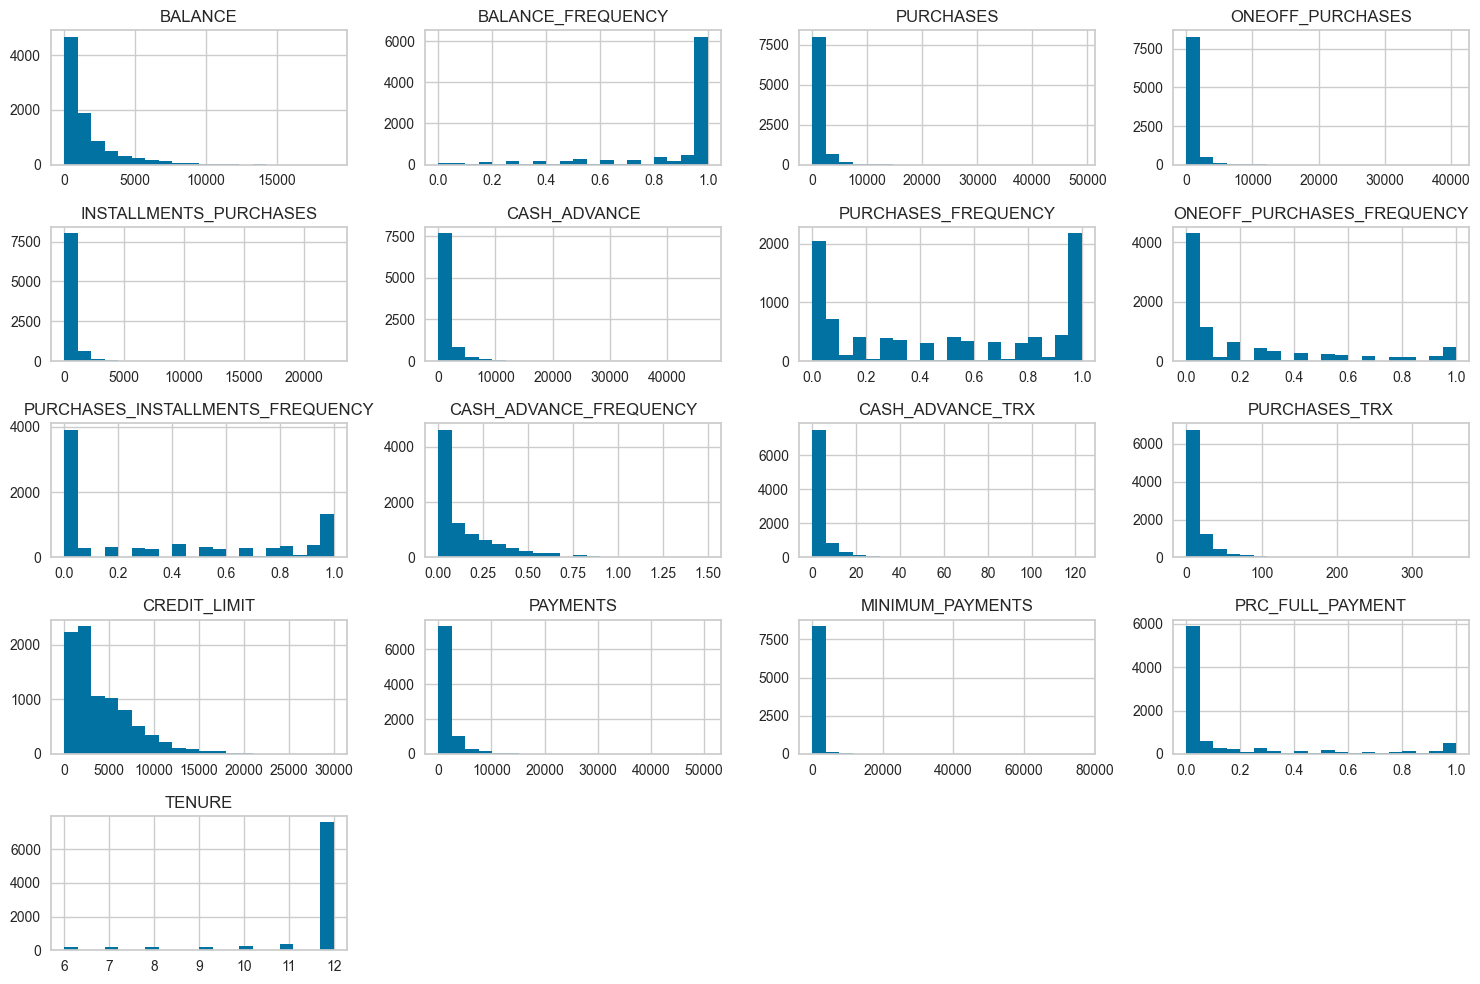

In [370]:
# Visualisasi distribusi fitur numerik
plt.figure(figsize=(15, 10))
data.select_dtypes(include=['float64', 'int64']).hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

**ANALISIS**

Pada tahap ini saya menampilkan histogram dari masing-masing fitur dan didapatkan bahwa :
1. fitur balance memiliki distribusi right skewed yang artinya sebagian besar pelanggan memiliki saldo rendah, sementara hanya sedikit yang memiliki saldo tinggi

2. fitur balance_frequency memiliki Distribusi bimodal, dengan mayoritas pelanggan berada di nilai 1.0, yang berarti mereka sering menggunakan kartu kreditnya secara rutin.

3. fitur purchases memiliki Distribusi skewed ke kanan, menunjukkan bahwa sebagian besar pelanggan melakukan pembelian dalam jumlah kecil.

4. fitur  oneoff_purchases memiliki distribusi skewed ke kanan yang artinya sebagian besar pelanggan melakukan pembelian satu kali dalam jumlah kecil, tetapi ada beberapa pelanggan yang melakukan pembelian dalam jumlah sangat besar.

5. fitur installments_purchases memiliki distribusi skewed ke kanan yang artinya sebagian besar pelanggan melakukan pembelian cicilan dalam jumlah kecil

6. fitur cash_advance memiliki memiliki distribusi skewed ke kanan yang artinya sebagian besar pelanggan hanya sedikit mengambil uang tunai dari kartu kredit.

7. fitur purchases_frequency memiliki distribusi yang i menunjukkan ada banyak pelanggan dengan nilai 0 (tidak sering melakukan pembelian).

8. fitur oneoff_purchases_frequency menunjukkan bahwa mayoritas pelanggan memiliki nilai rendah atau 0 (jarang melakukan pembelian satu kali dengan nominal besar)

9. fitur purchases_installments_frequency menunjukkan Beberapa pelanggan lebih cenderung menggunakan sistem cicilan dibandingkan pembayaran langsung

10. fitur cash_advance_frequency menunjukkan bahwa Sebagian besar pelanggan memiliki nilai 0 atau sangat rendah (jarang menggunakan fitur cash advance).

11. fitur cash_advance_trx menunjukkan bahwa Sebagian besar pelanggan melakukan sedikit transaksi cash advance

12. fitur purchases_trx menunjukkan bahwa Sebagian besar pelanggan memiliki jumlah transaksi pembelian yang rendah


13. fitur credit_limit memiliki distribusi skewed ke kanan yang artinya sebagian besar pelanggan memiliki batas kredit rendah.

14. fitur payments menunjukkan bahwa sebagian besar pelanggan membayar dalam jumlah kecil, tetapi ada beberapa yang membayar dalam jumlah sangat besar.

15. fitur minimum_payments menunjukkan bahwa menunjukkan bahwa beberapa pelanggan tidak selalu membayar jumlah minimum yang diwajibkan

16. fitur prc_full_payments menunjukkan bahwa Sebagian besar pelanggan memiliki nilai rendah, menunjukkan bahwa mereka jarang membayar penuh tagihan kartu kredit mereka setiap bulan.

17. fitur tenure menunjukkan bahwa Mayoritas pelanggan memiliki masa kepemilikan kartu 12 tahun, menunjukkan bahwa dataset ini berisi banyak pelanggan lama






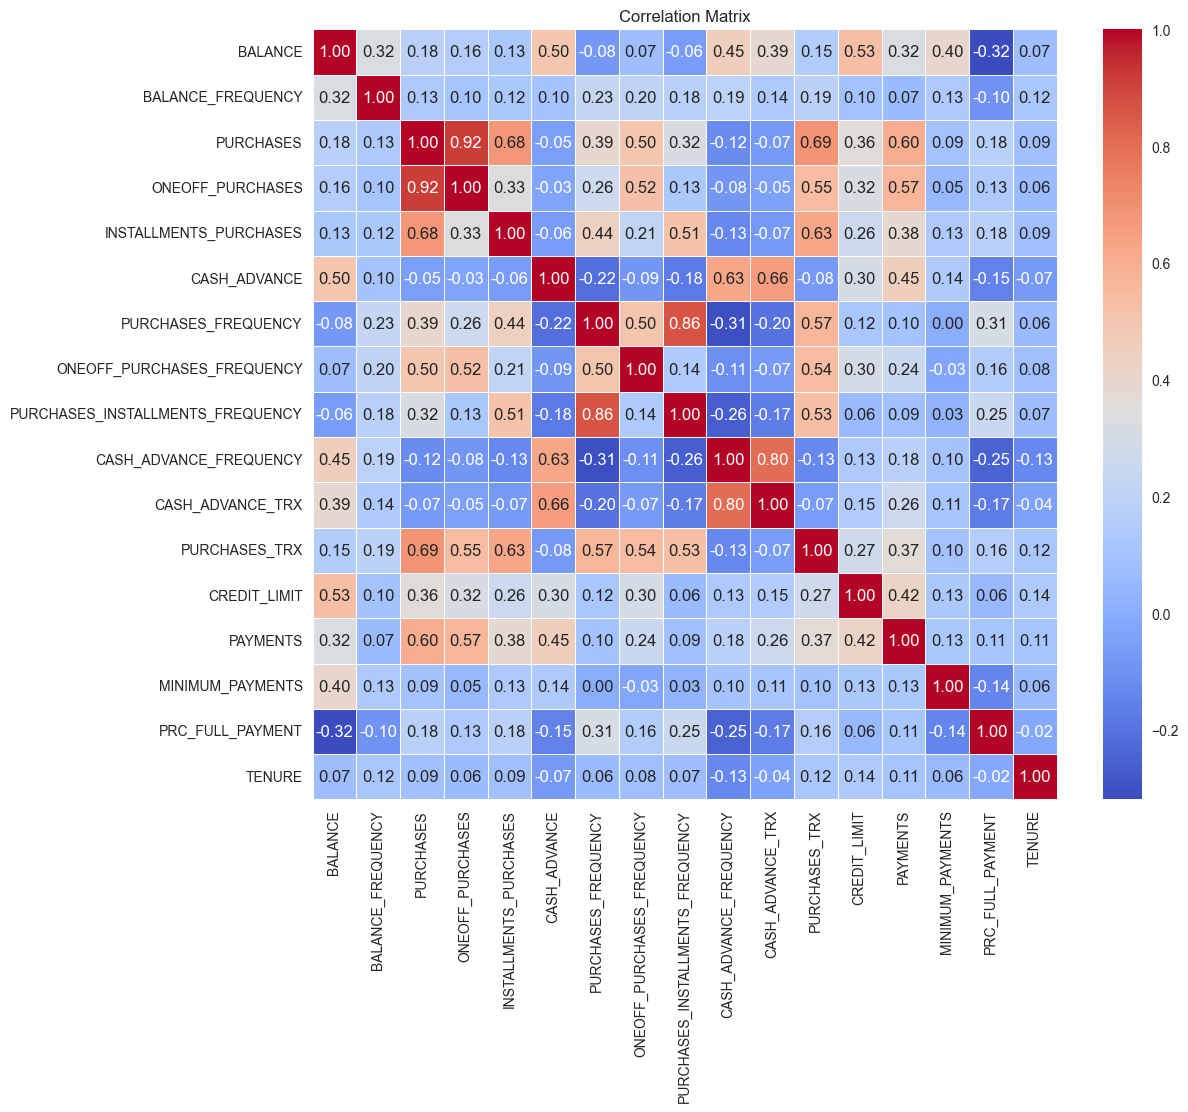

In [371]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi korelasi antar fitur
plt.figure(figsize=(12, 10))
correlation_matrix = data.select_dtypes(include=['float64', 'int64']).corr()

# Gunakan annot=True agar angka korelasinya muncul
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Matrix')
plt.show()


**ANALISIS**
Pada tahap ini saya menampilkan heatmap untuk menunjukkan korelasi masing-masing fitur dan didapatkan bahwa :
 1.  PURCHASES dan ONEOFF_PURCHASES (0.92) : Pembelian total sangat berkorelasi dengan pembelian sekali bayar, yang menunjukkan bahwa banyak pelanggan melakukan transaksi dalam jumlah besar dalam satu kali pembayaran.

2. PURCHASES dan INSTALLMENTS_PURCHASES (0.68) : Semakin tinggi jumlah pembelian total, semakin tinggi juga pembelian cicilan

3. PURCHASES_FREQUENCY dan PURCHASES_INSTALLMENTS_FREQUENCY (0.86) : Pelanggan yang sering berbelanja juga cenderung sering menggunakan cicilan.

4. CASH_ADVANCE dan BALANCE (0.50) :  Saldo kartu kredit lebih tinggi pada pelanggan yang sering mengambil uang tunai dari paa kartu kredit.

5.  PURCHASES_TRX dengan PURCHASES_INSTALLMENTS_FREQUENCY (0.53) : Semakin sering pelanggan melakukan transaksi, semakin besar kemungkinan mereka menggunakan metode cicilan.

6. PAYMENTS dengan PURCHASES (0.57) : Pelanggan yang membayar lebih besar cenderung juga banyak melakukan pembelian

7. CREDIT_LIMIT dan BALANCE (0.53) :  Pelanggan dengan batas kredit lebih tinggi cenderung memiliki saldo lebih tinggi.

8. BALANCE dan PRC_FULL_PAYMENT (-0.32) : Pelanggan dengan saldo tinggi cenderung tidak membayar tagihannya secara penuh setiap bulan

9. CASH_ADVANCE_FREQUENCY dan PURCHASES_FREQUENCY (-0.12) : Pelanggan yang sering menarik uang tunai dari kartu kredit cenderung tidak sering melakukan pembelian.

10. TENURE dan CASH_ADVANCE_FREQUENCY (-0.13) : seseorang yang memiliki kartu kredit lebih lama, semakin kecil mereka menggunakan fitur cash advance.



# 2. FEATURE ENGGINERING

**A. HANDLING DUPLICATE DATA**

In [372]:
# @title Checking duplicate data
len(data.drop_duplicates()) / len(data)
#jika output dari code di cell ini tidak bernilai 1 maka terdapat duplikat

1.0

**ANALISIS**

pada tahap ini saya mengecek apakah masih ada duplikat data atau tidak, jika output yang dihasilkan berupa nilai 1 maka data tidak memiliki data duplikat. Dan didapatkan outptu yakni angka 1 yang mneunjukkan tidak ada data duplikat

**B. HANDLING MISSING VALUE**

In [373]:
print(data.isnull().sum())


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


**ANALISIS**

pada tahap ini mengecek apakah masih ada missing value atau tidak dan didapatkan bahwa fitur credit_limit dan minimum_payments memiliki missing value sehinggaa harus dihandling dengan imputasi

In [374]:
missing_percentage = 100 * data['CREDIT_LIMIT'].isnull().sum() / len(data)
print(f"Persentase missing value pada 'CREDIT_LIMIT': {missing_percentage:.2f}%")


Persentase missing value pada 'CREDIT_LIMIT': 0.01%


**ANALISIS**

disini saya mengece apakah missing vakue lebih dari 20% atau tidak =, hasilnya hanya 0.01% dan tidak lebih dari 20% sehingga harus dilakukan imputais bukan menghapus kolomnya

In [375]:
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].median(), inplace=True)

print(data.isnull().sum())

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


C:\Users\nimaa\AppData\Local\Temp\ipykernel_10268\2678779728.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].median(), inplace=True)


**ANALISIS**

disini saya mengisi nilai missing value pada fitur credit_limit menggunakan metode median dari fitur ini sendiri. Setelah itu saya cek apakah imputasi berhasil atau tidak dan didapatkan di output bahwa di kolom fitur credit_limit sudah tidak ada missing value

In [376]:
missing_percentage = 100 * data['MINIMUM_PAYMENTS'].isnull().sum() / len(data)
print(f"Persentase missing value pada 'MINIMUM_PAYMENTS': {missing_percentage:.2f}%")


Persentase missing value pada 'MINIMUM_PAYMENTS': 3.50%


**ANALISIS**

disini saya mengece apakah missing vakue lebih dari 20% atau tidak =, hasilnya hanya 3,5% dan tidak lebih dari 20% sehingga harus dilakukan imputais bukan menghapus kolomnya

In [377]:
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median(), inplace=True)

print(data.isnull().sum())

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


C:\Users\nimaa\AppData\Local\Temp\ipykernel_10268\3832375147.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median(), inplace=True)


**ANALISIS**

disini saya mengisi nilai missing value pada fitur minimum_payments menggunakan metode median dari fitur ini sendiri. Setelah itu saya cek apakah imputasi berhasil atau tidak dan didapatkan di output bahwa di kolom fitur minimum_payments sudah tidak ada missing value

In [378]:
print(data.isnull().sum())

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


**C. HANDLING DATA OUTLIER**

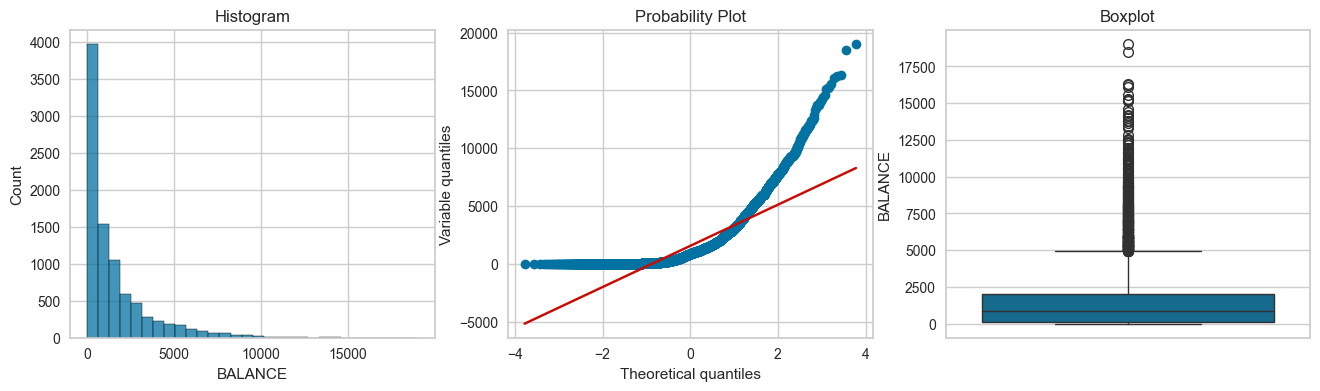

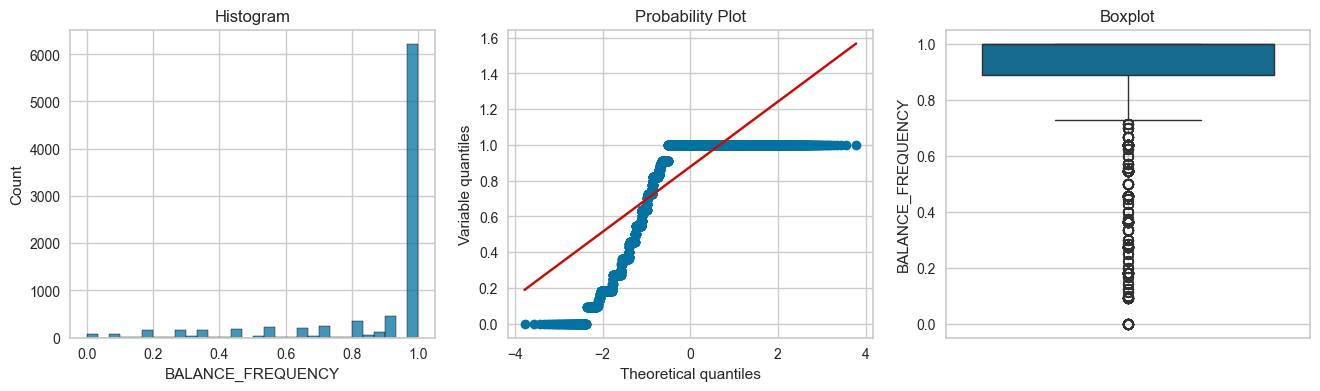

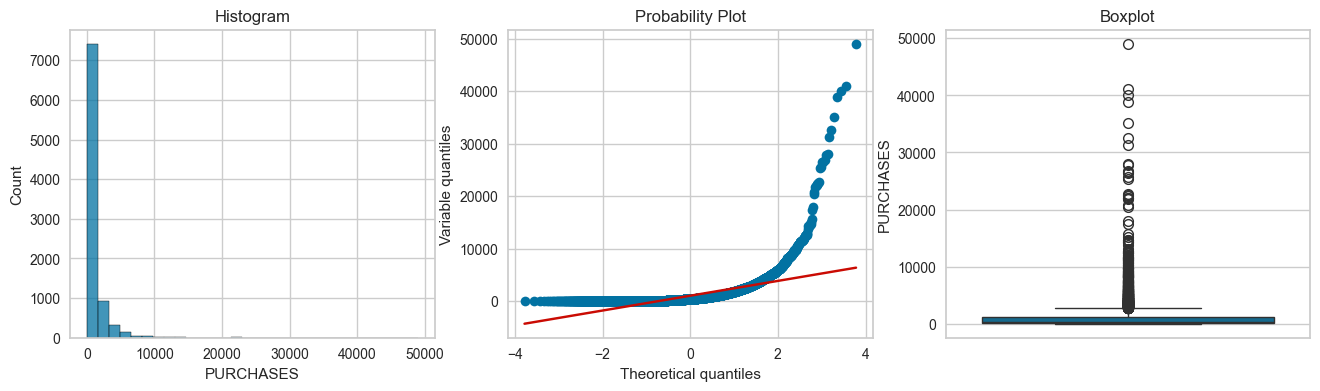

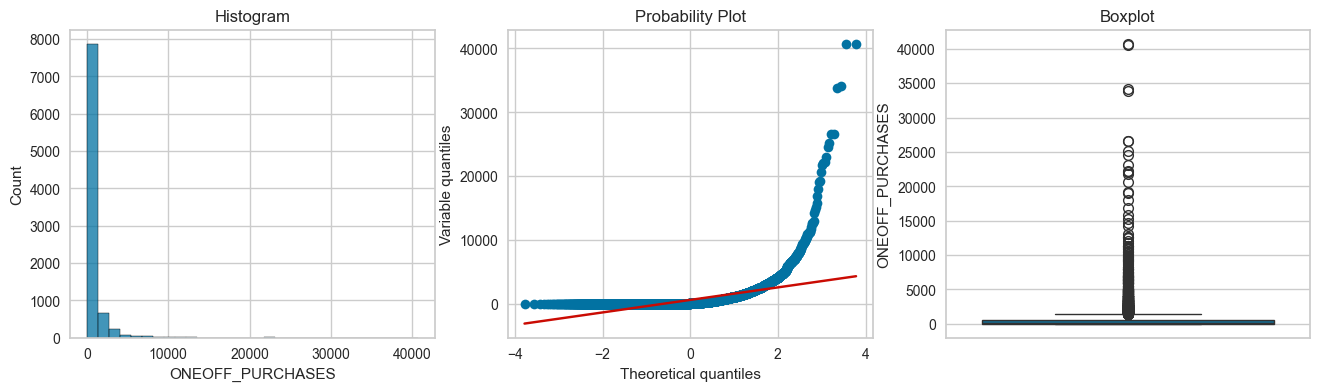

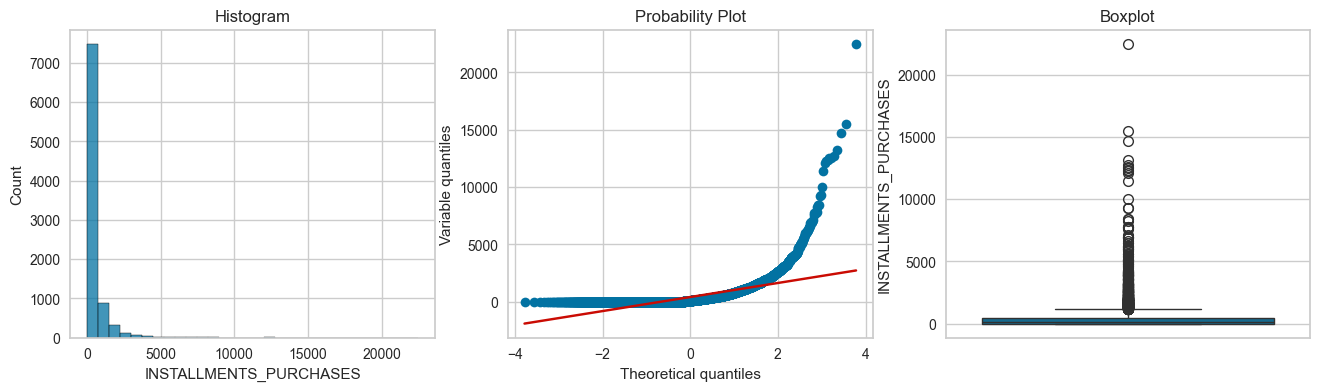

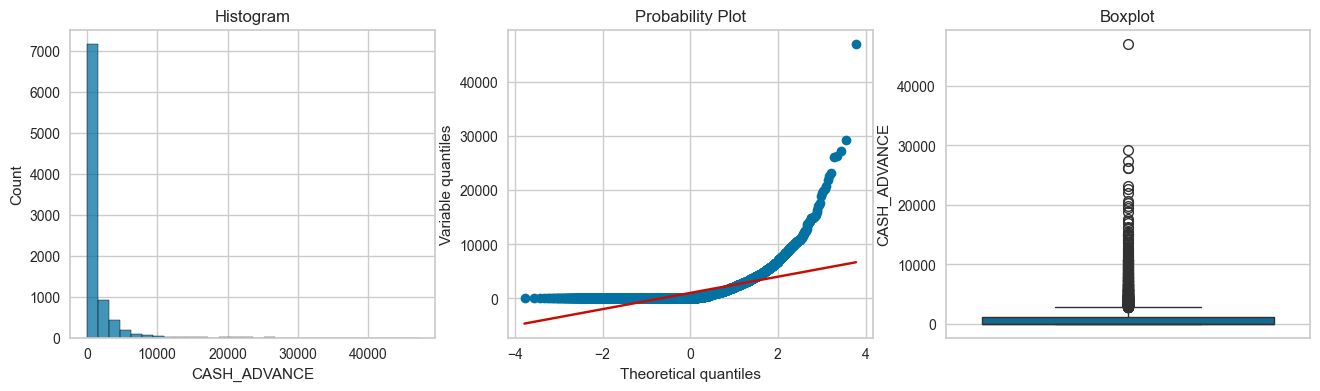

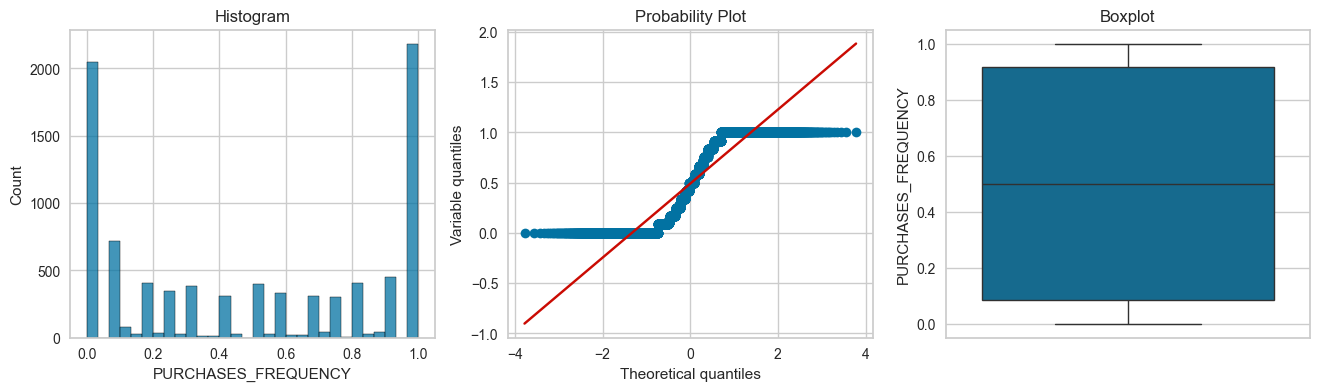

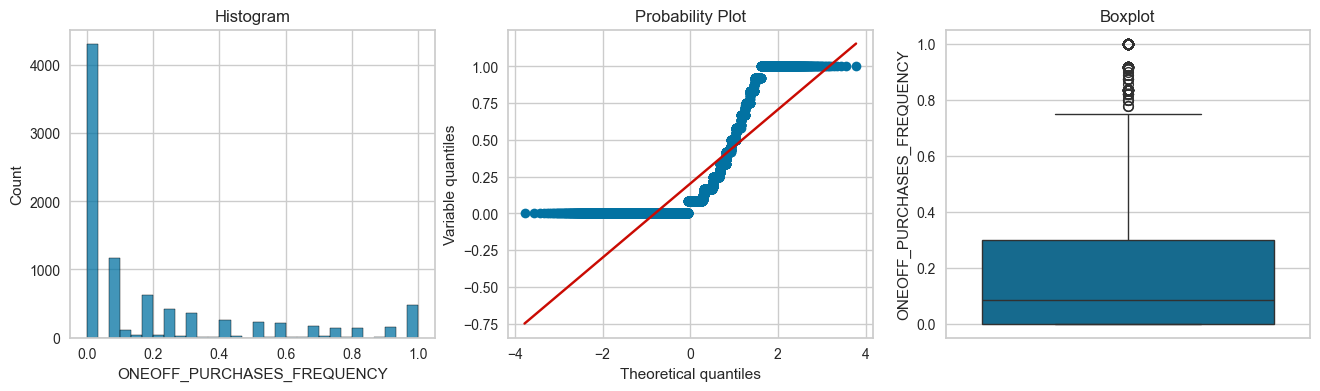

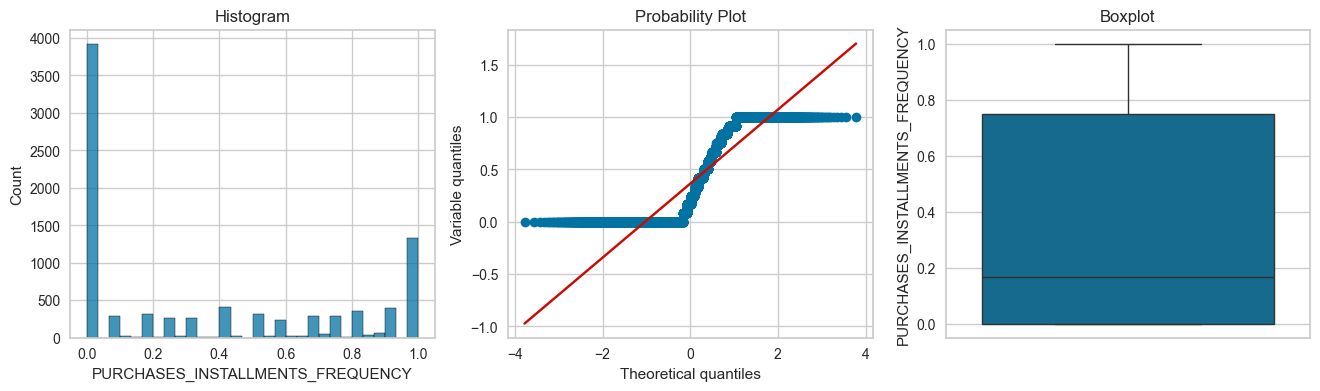

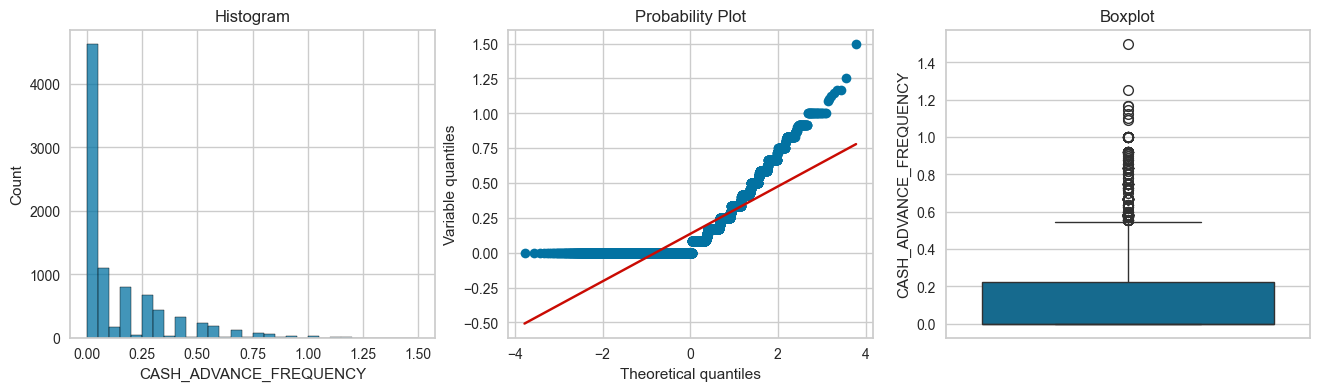

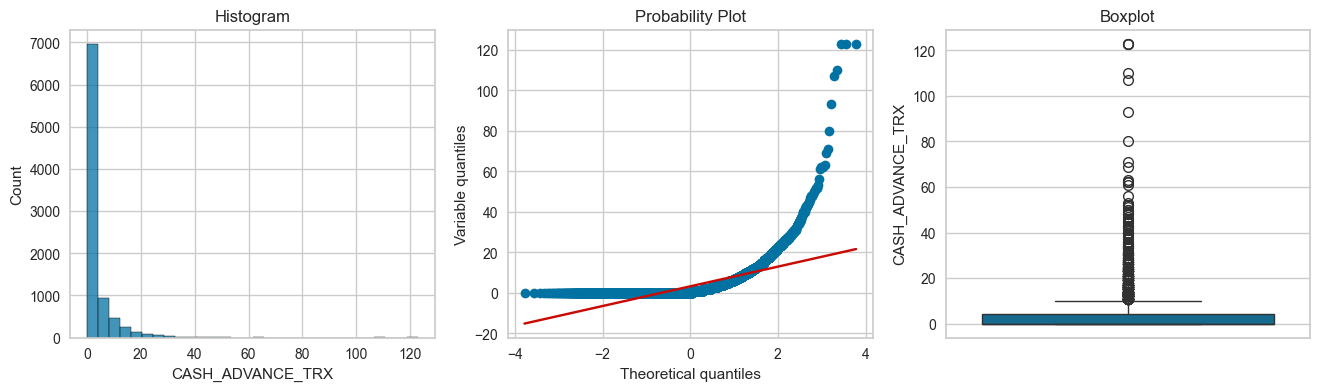

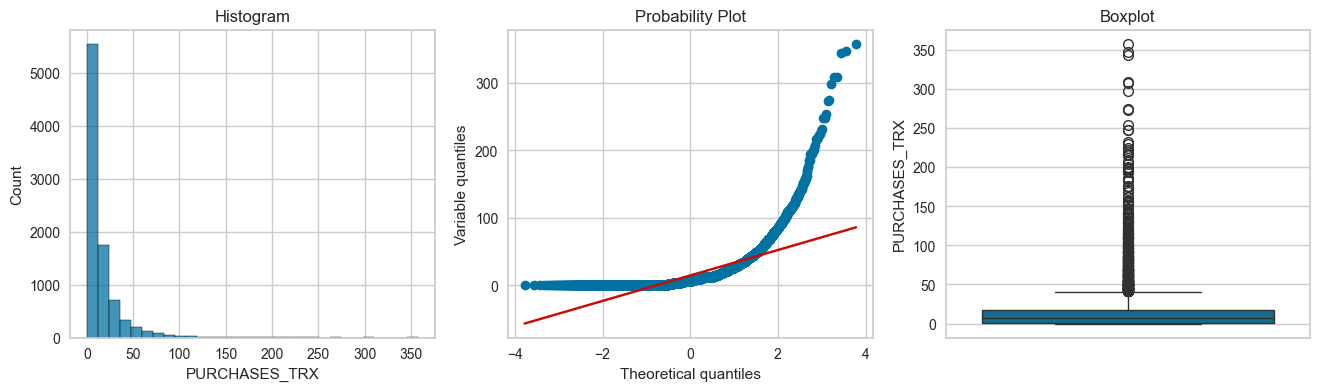

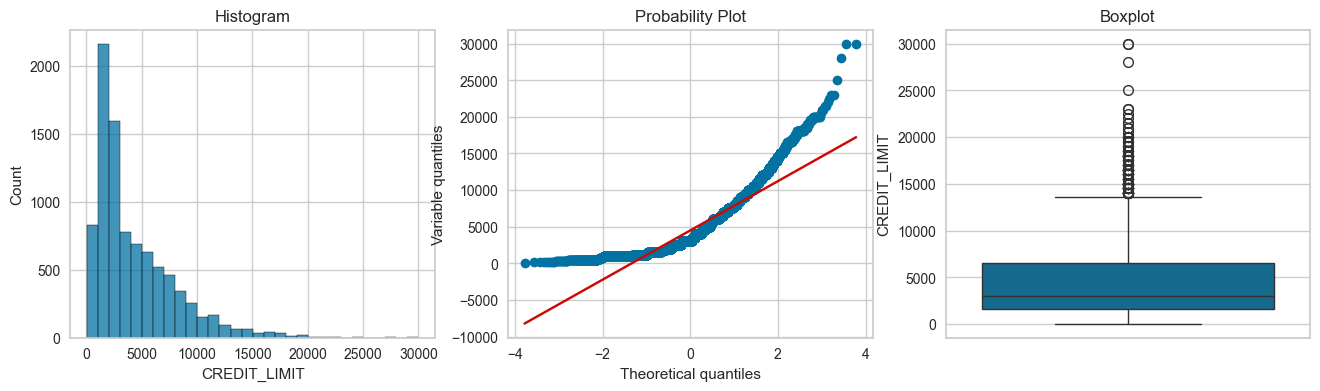

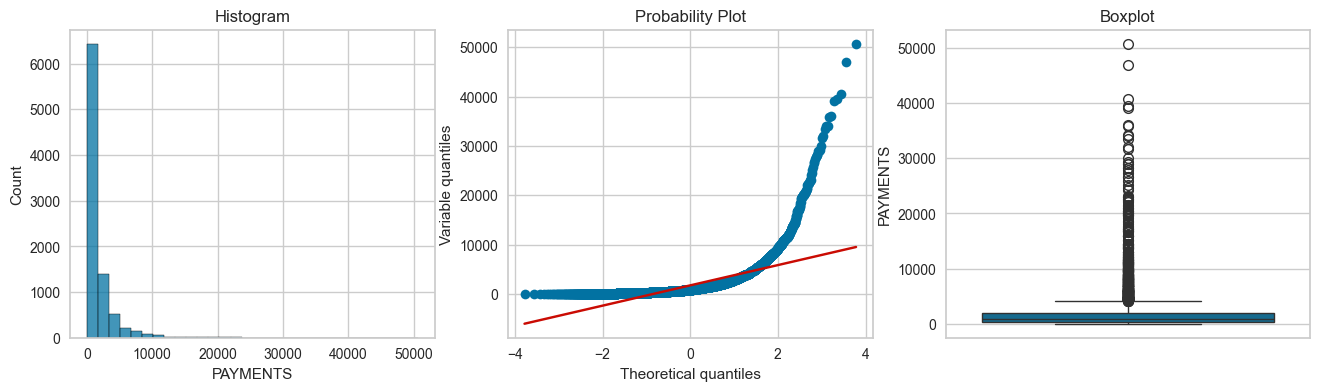

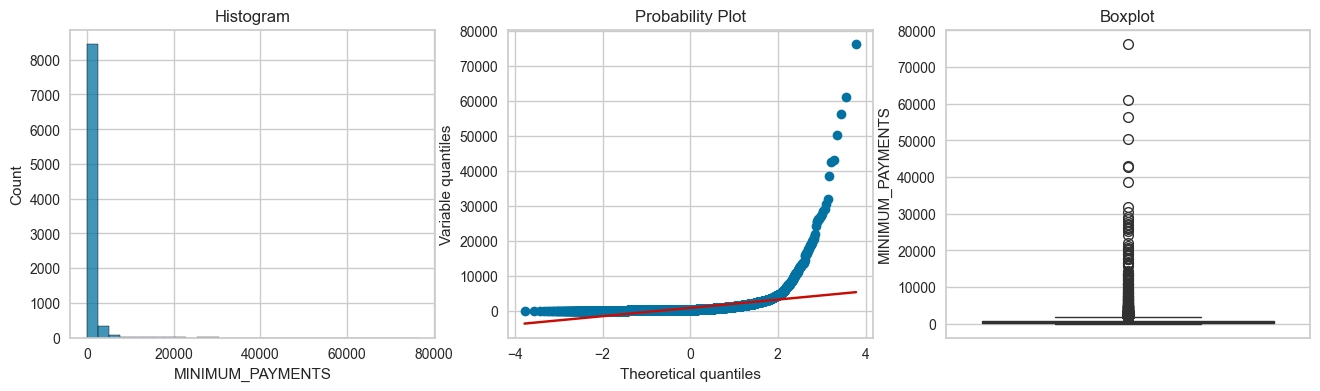

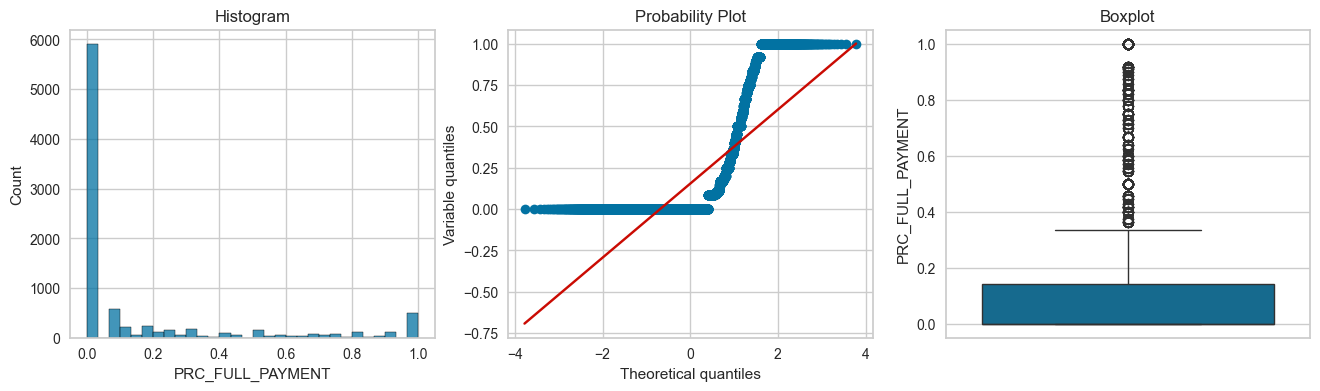

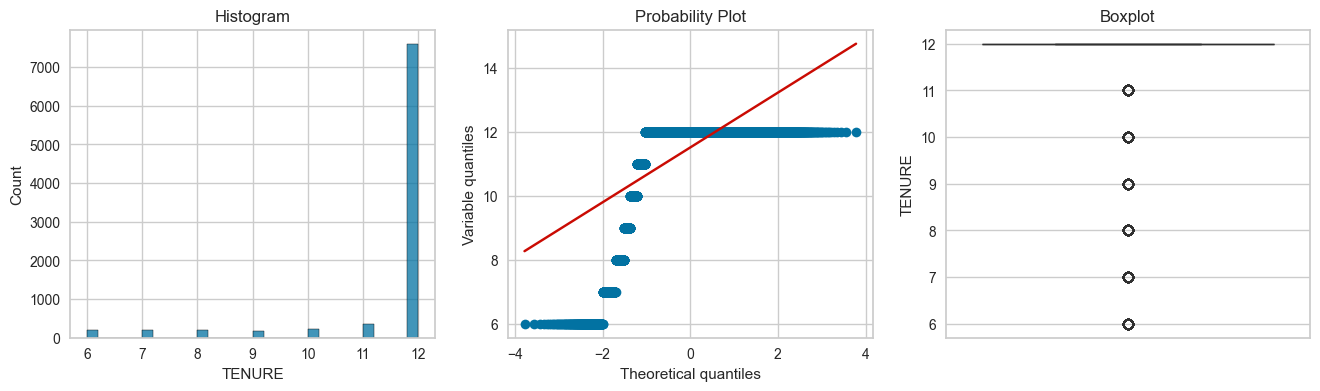

In [379]:

numerical_data = data.select_dtypes(include=['float64', 'int64'])

# untuk plot Q-Q
import scipy.stats as stats
def check_plot(data, variable):
    # fungsi mengambil kerangka data (df) dan
    # variabel yang diminati sebagai argumen

    # tentukan ukuran gambar
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(data[variable], bins=30)
    plt.title('Histogram')

    # plot Q-Q
    plt.subplot(1, 3, 2)
    stats.probplot(data[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=data[variable])
    plt.title('Boxplot')

    plt.show()

for column in numerical_data.columns:
    check_plot(data, column)

**ANALISIS**

pada tahap ini saya mengecek variabel mana saja yang memiliki data outlier, dapat dilihat bahwa fitur yang memiliki data outlier yakni:
1. balance
2. balance_frequency
3. purchases
4. oneoff_purchases
5. installments_purchases
6. cash_advance
7. oneoff_purchases_frequency
8. cash_advance_frequency
9. cash_advance_trx
10. purchases_trx
11. credit_limit
12. payments
13. minimum_payments
14. prc_full_payments



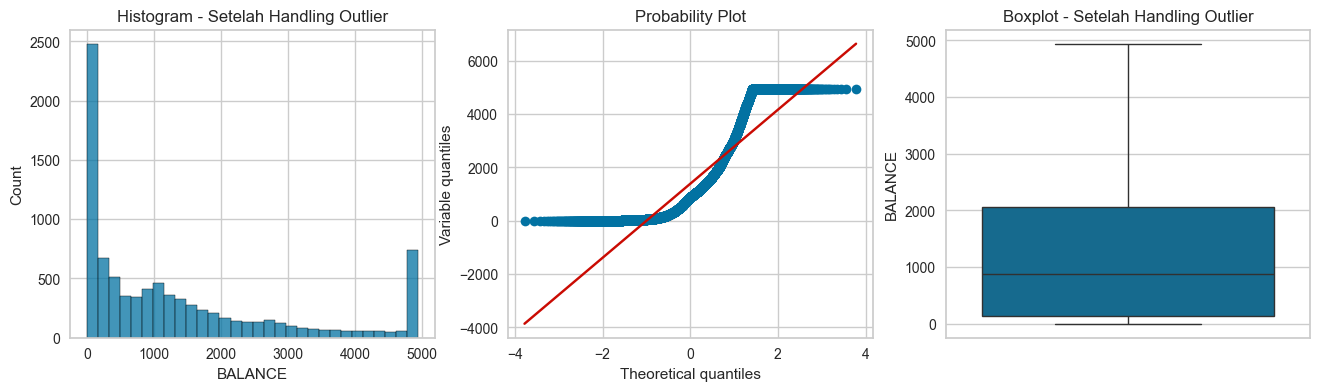

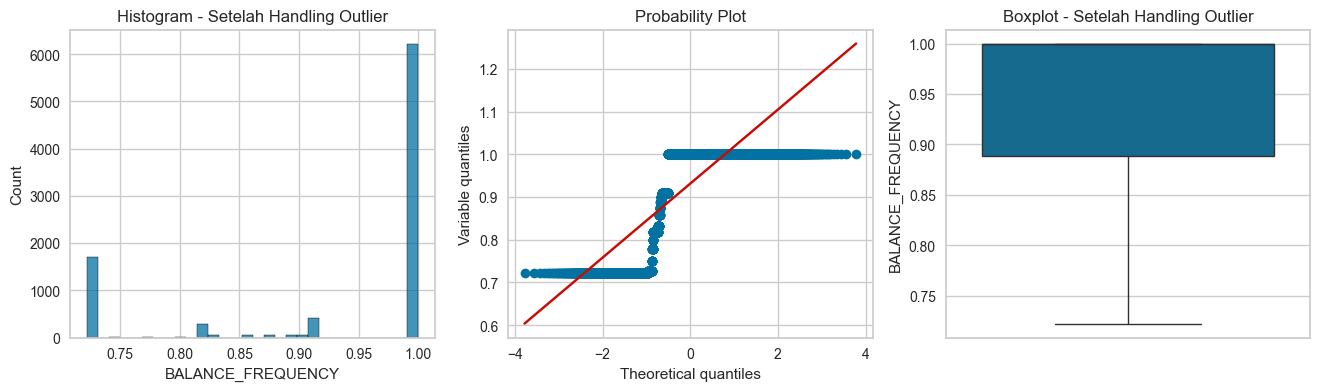

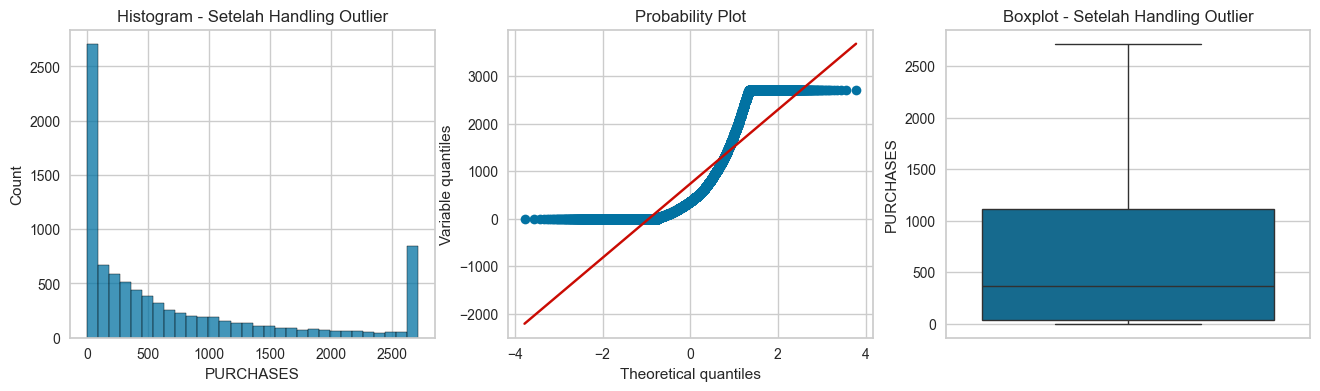

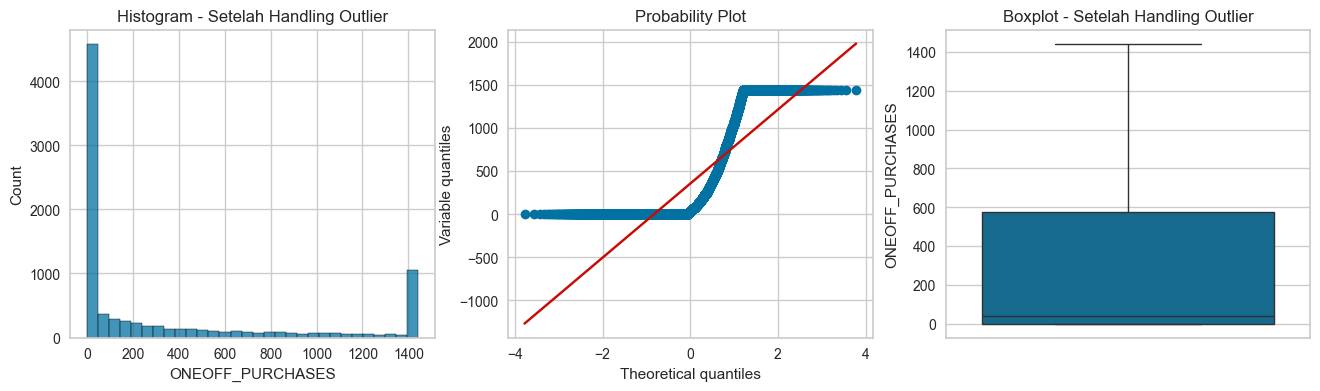

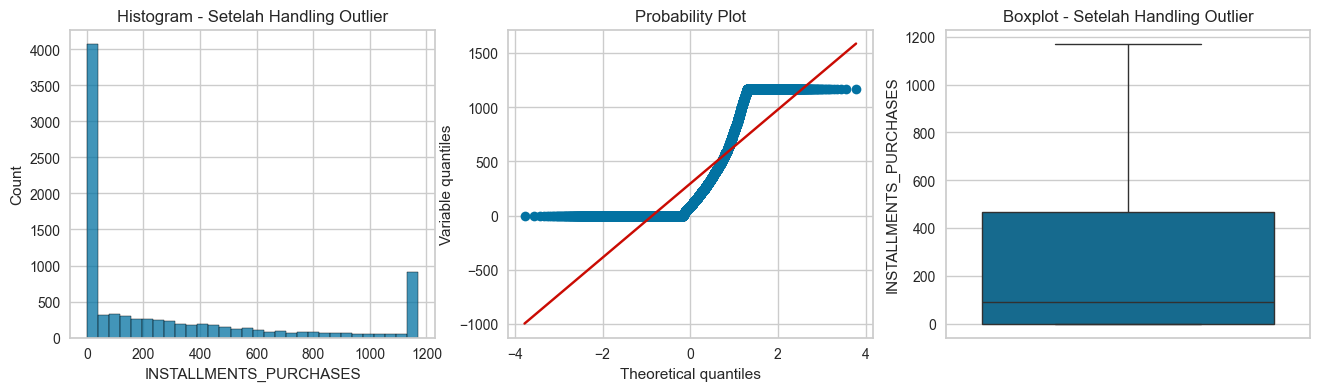

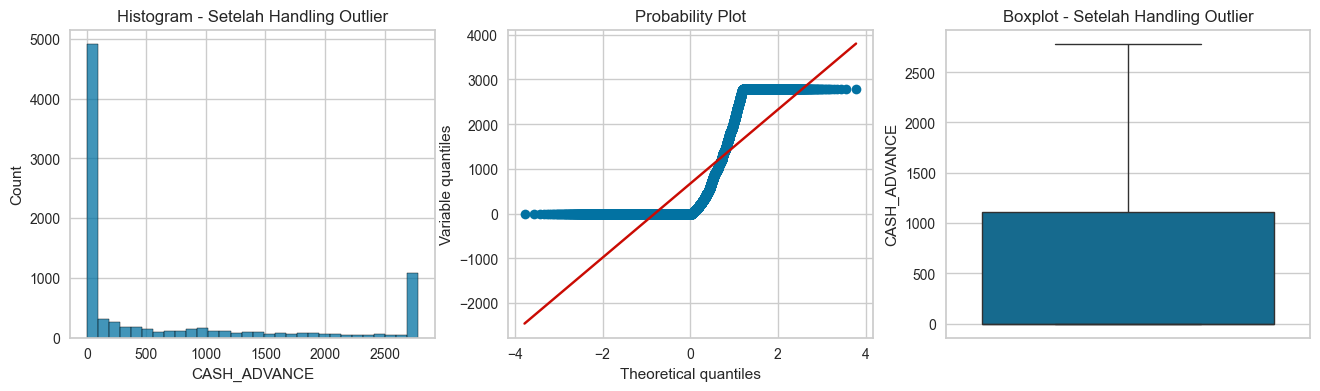

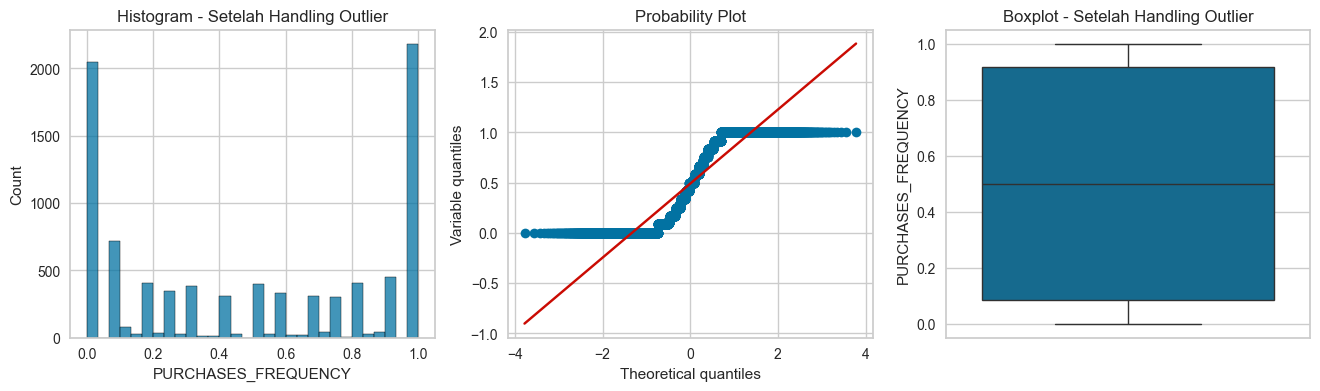

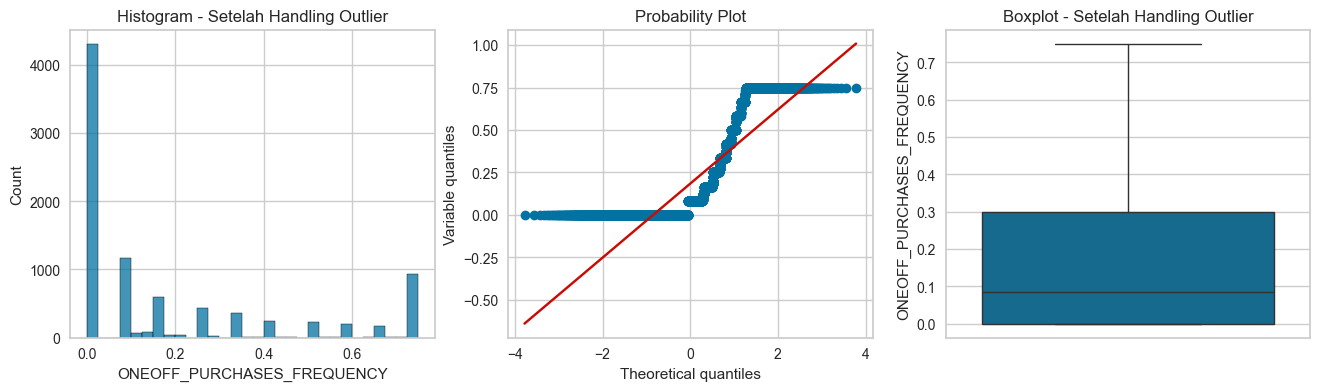

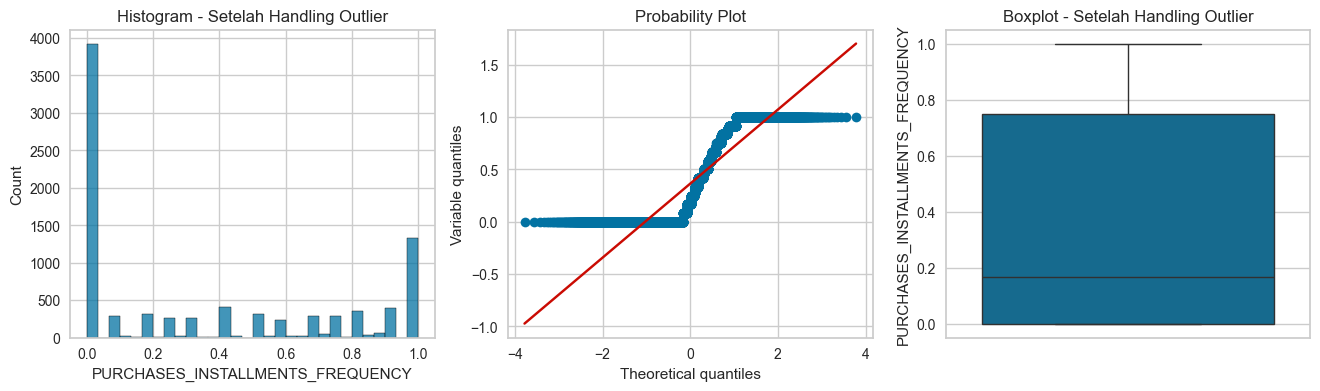

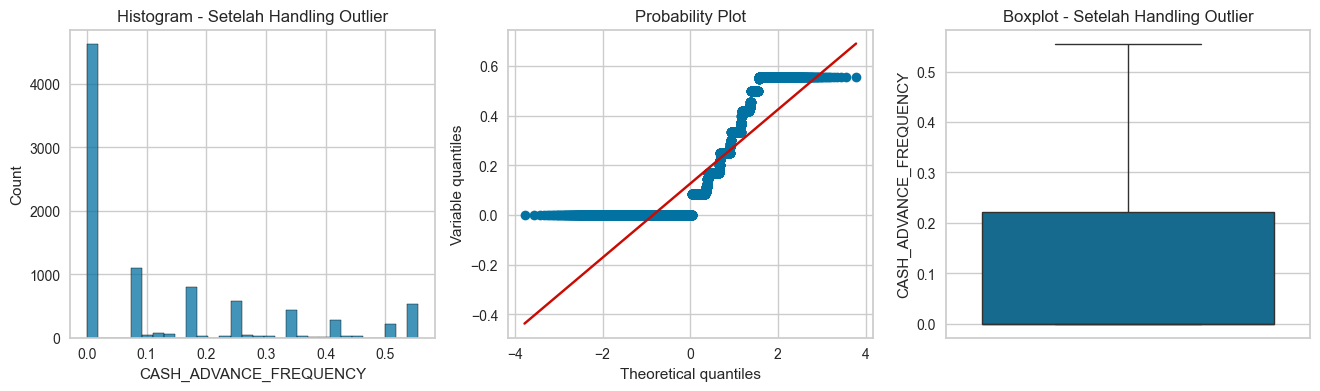

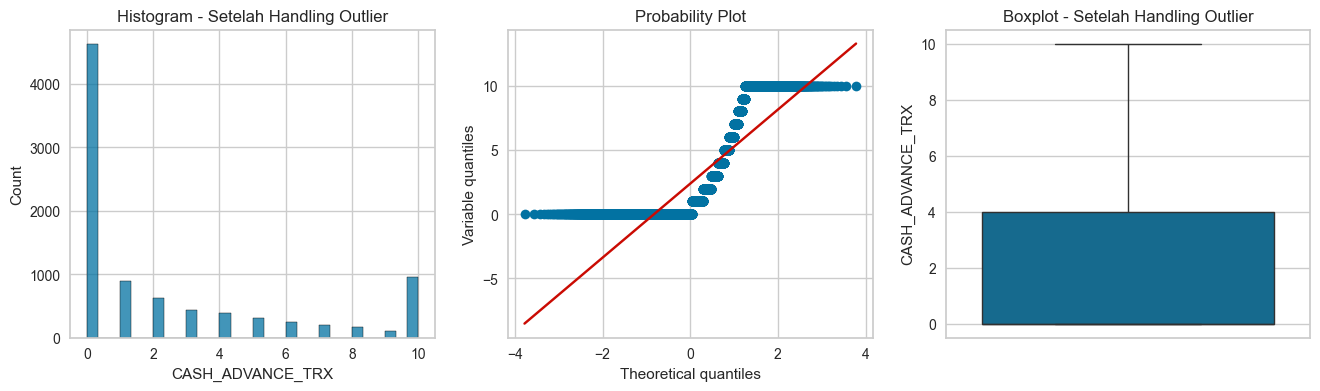

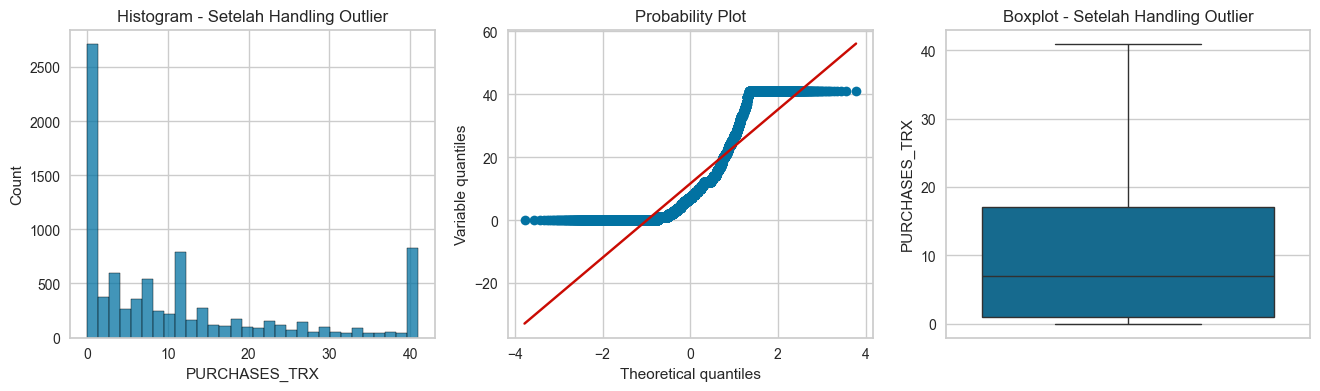

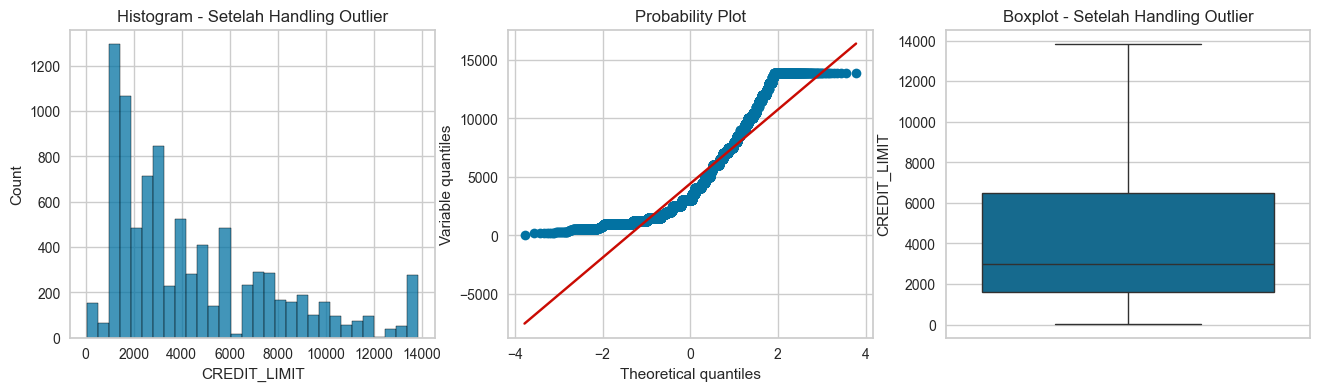

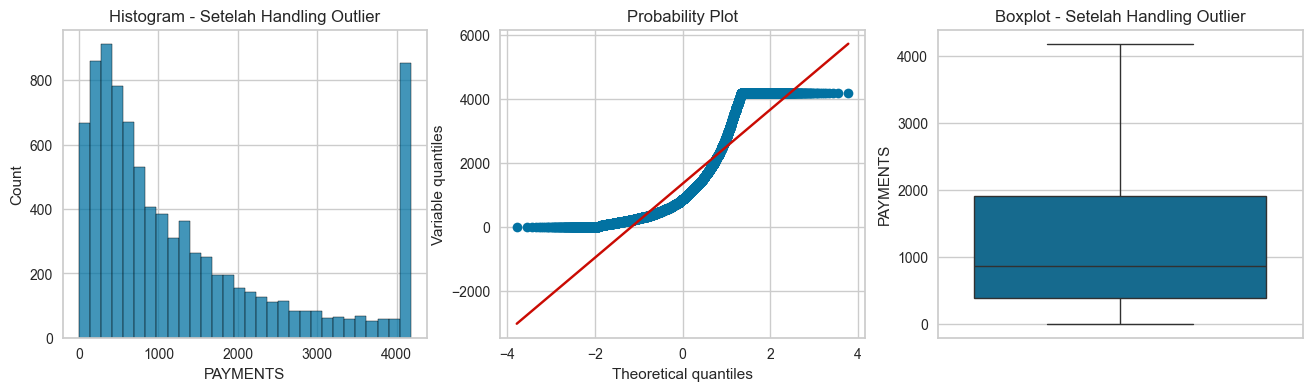

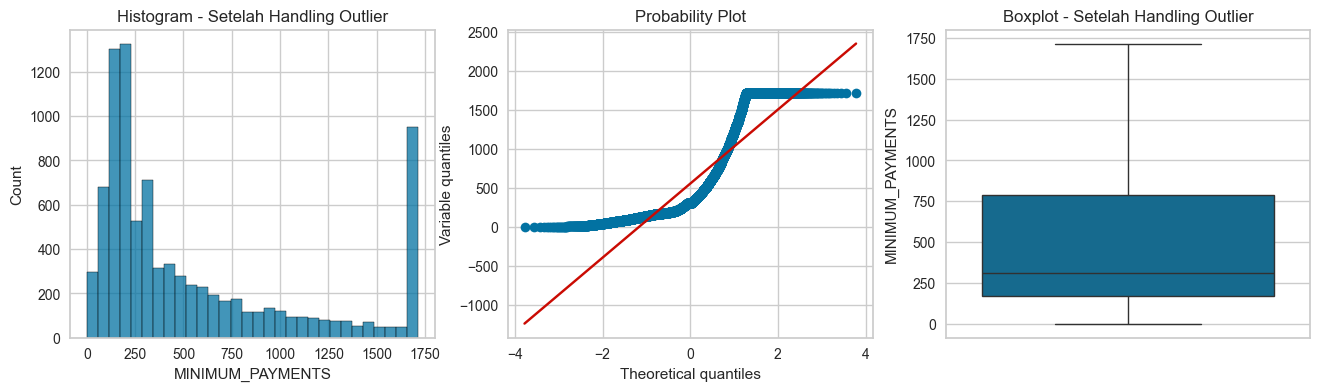

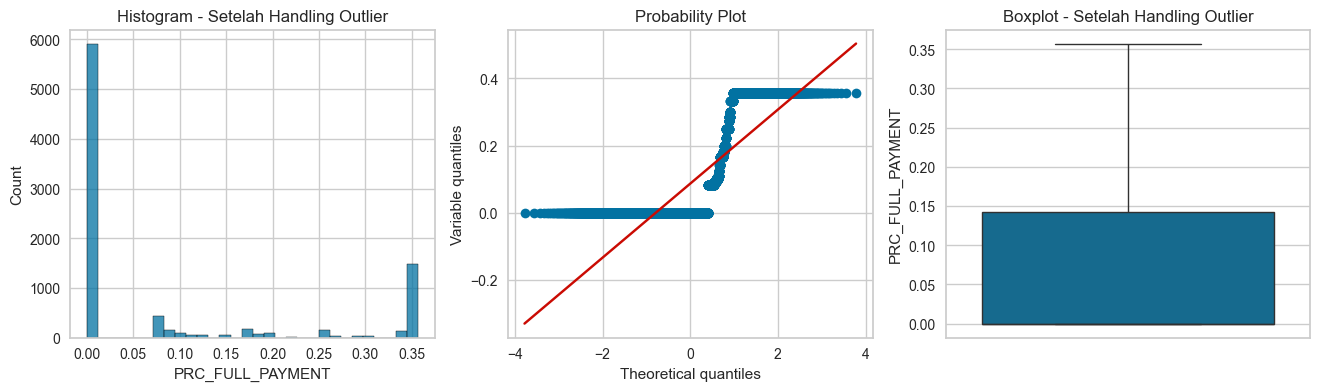

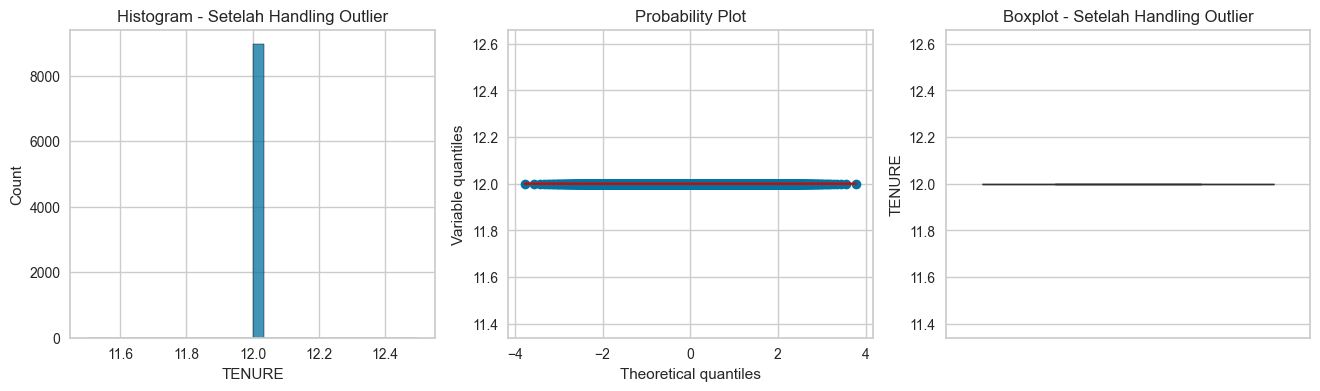

In [380]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

def handle_outliers_iqr_capping(df, columns, k=1.5):
    """
    Menangani outlier menggunakan metode IQR Capping dan menyimpan hasilnya ke variabel 'data'.
    """
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - k * IQR
        upper_bound = Q3 + k * IQR
        
        # Melakukan capping outlier
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    
    return df

# Menangani outlier pada semua kolom numerik dan menyimpan hasilnya ke variabel 'data'
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data = handle_outliers_iqr_capping(data, numerical_columns)

# Fungsi untuk menampilkan histogram, Q-Q plot, dan box plot setelah handling outlier
def check_plot(data, variable):
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(data[variable], bins=30)
    plt.title(f'Histogram - Setelah Handling Outlier')

    # Plot Q-Q
    plt.subplot(1, 3, 2)
    stats.probplot(data[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # Box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=data[variable])
    plt.title(f'Boxplot - Setelah Handling Outlier')

    plt.show()

# Menampilkan hasil setelah handling outlier
for column in numerical_columns:
    check_plot(data, column)


**ANALISIS**

Pada kasus ini saya melakukan handling outlier dengan menggunakan metode IQR capping, cara kerja IQ ini yakni  Nilai yang terlalu besar atau kecil (di luar batas tertentu) akan dibatasi ke nilai maksimum atau minimum yang masih dalam rentang normal. Dapat di lihat bahwa  14 fitur tadi yang memiliki data outlier sudah tidak memiliki data outlier

1. balance
2. balance_frequency
3. purchases
4. oneoff_purchases
5. installments_purchases
6. cash_advance
7. oneoff_purchases_frequency
8. cash_advance_frequency
9. cash_advance_trx
10. purchases_trx
11. credit_limit
12. payments
13. minimum_payments
14. prc_full_payments


# 3. FEATURE SCALLING

In [381]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Memilih hanya kolom numerik
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Melakukan scaling hanya pada kolom numerik
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Menampilkan hasil dalam bentuk DataFrame
 
data.head()


CUST_ID   BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001  0.008275           0.345455   0.035127          0.000000   
1  C10002  0.647889           0.672727   0.000000          0.000000   
2  C10003  0.504792           1.000000   0.284686          0.535617   
3  C10004  0.337183           0.000000   0.551940          1.000000   
4  C10005  0.165431           1.000000   0.005891          0.011084   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                0.081428      0.000000             0.166667   
1                0.000000      1.000000             0.000000   
2                0.000000      0.000000             1.000000   
3                0.000000      0.073903             0.083333   
4                0.000000      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.111111                          0.000000   
4                    0.111111                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00               0.0       0.048780      0.068841   
1                    0.45               0.4       0.000000      0.503623   
2                    0.00               0.0       0.292683      0.539855   
3                    0.15               0.1       0.024390      0.539855   
4                    0.00               0.0       0.024390      0.083333   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0  0.048302          0.081313          0.000000     0.0  
1  0.982075          0.625086          0.622222     0.0  
2  0.148894          0.365651          0.000000     0.0  
3  0.000000          0.182063          0.000000     0.0  
4  0.162362          0.142684          0.000000     0.0

**ANALISIS**

berdasarkan statistik deskriptif di awal tadi hampir semua fitur memiliki nilai min dan max yang sangat jauh yang artinya memiliki skala nilai yang berbeda jauh maka dari itu disini saya melakukan normalisasi dengan menggunakan metde minmax scaller yang akan merubah  nilai dalam rentang 1 hingga 0

In [382]:
data.describe()  

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
count  8950.000000        8950.000000  8950.000000       8950.000000   
mean      0.281313           0.753713     0.271423          0.245483   
std       0.311058           0.399541     0.323850          0.354568   
min       0.000000           0.000000     0.000000          0.000000   
25%       0.025953           0.600000     0.014594          0.000000   
50%       0.176694           1.000000     0.133025          0.026325   
75%       0.415572           1.000000     0.408756          0.400000   
max       1.000000           1.000000     1.000000          1.000000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean                 0.252260      0.241500             0.490351   
std                  0.338156      0.358591             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                  0.075965      0.000000             0.500000   
75%                  0.400000      0.400000             0.916667   
max                  1.000000      1.000000             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.246364                          0.364437   
std                      0.340890                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.111111                          0.166667   
75%                      0.400000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8950.000000   
mean                 0.226910          0.238313       0.283507      0.316604   
std                  0.310818          0.341788       0.318089      0.245202   
min                  0.000000          0.000000       0.000000      0.000000   
25%                  0.000000          0.000000       0.024390      0.112319   
50%                  0.000000          0.000000       0.170732      0.213768   
75%                  0.400000          0.400000       0.414634      0.467391   
max                  1.000000          1.000000       1.000000      1.000000   

          PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
count  8950.000000       8950.000000       8950.000000  8950.0  
mean      0.322429          0.324535          0.244225     0.0  
std       0.304651          0.310219          0.388125     0.0  
min       0.000000          0.000000          0.000000     0.0  
25%       0.091738          0.099587          0.000000     0.0  
50%       0.205102          0.182063          0.000000     0.0  
75%       0.455043          0.459752          0.400000     0.0  
max       1.000000          1.000000          1.000000     0.0

# 3. PEMBENTUKAN MODEL

**A. KMEANS**

In [383]:
from sklearn.cluster import KMeans

# Memilih hanya kolom numerik untuk clustering
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data_numerical = data[numerical_columns]  # Simpan data numerik saja

# Inisialisasi model KMeans
kmeans = KMeans(n_clusters=3, init="k-means++", n_init=10, random_state=42)

# Melakukan clustering hanya pada data numerik
clusters = kmeans.fit_predict(data_numerical)

# Menampilkan parameter model
print(kmeans.get_params(deep=False))




{'algorithm': 'lloyd', 'copy_x': True, 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 3, 'n_init': 10, 'random_state': 42, 'tol': 0.0001, 'verbose': 0}


**ANALISIS**

pada tahap ini saya akan melakukan clustering menggunakan algoritma k-means dengan k sebanyak 3 yang artinya akan ada 3 cluster


Cluster Analysis

SSE (Inertia): 10400.543616658135

Silhouette Score: 0.21565782591505175
Davies-Bouldin Index: 1.520421995423682
Calinski-Harabasz Score: 2761.4437418511357


C:\Users\nimaa\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


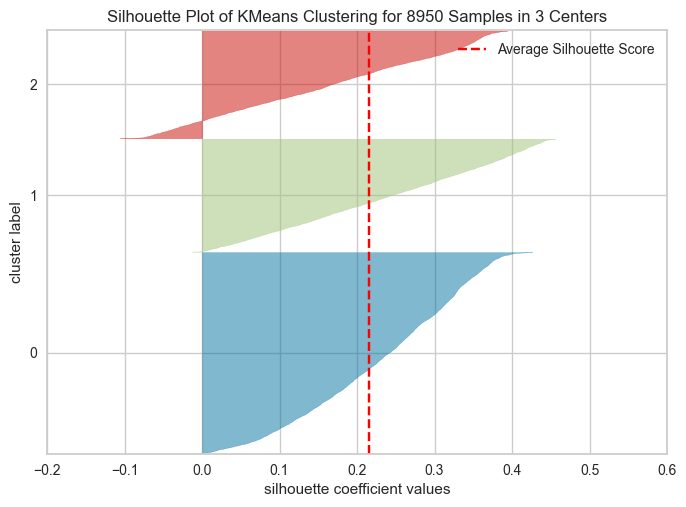

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 8950 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [384]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from yellowbrick.cluster import SilhouetteVisualizer

# Pilih hanya kolom numerik
data = data.select_dtypes(include=['float64', 'int64'])

# Normalisasi menggunakan MinMaxScaler
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# Melakukan clustering dengan K-Means
kmeans = KMeans(n_clusters=3, init="k-means++", n_init=10, random_state=42)
clusters = kmeans.fit_predict(data)

# Cluster Analysis
print('\nCluster Analysis\n')

# SSE (Sum of Squared Errors)
print('SSE (Inertia):', kmeans.inertia_)

# Silhouette Score
print('\nSilhouette Score:', silhouette_score(data, clusters))

# Davies-Bouldin Index
db_index = davies_bouldin_score(data, clusters)
print(f"Davies-Bouldin Index: {db_index}")

# Calinski-Harabasz Score
ch_score = calinski_harabasz_score(data, clusters)
print(f"Calinski-Harabasz Score: {ch_score}")

# Visualisasi Silhouette
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(data)  # Fit the data to the visualizer
visualizer.show()     # Finalize and render the figure


**ANALISIS**

Berdasarkan clustering dengan menggunakan algoritma k-menas didapatkan bahwa :
1. nilai silhoutte hanya 0.21565782591505175 yang menunjukkan bahwa kurang optimal
2. nilai Davies-Bouldin lebih dari 1 yang menunjukkan cluster tidak terlalu terpisah dengan baik

3.  Pada shilloutte plot terdapat data yang dibawah o yang artinya masih ada data yang tidak cocok dengan clusternya

**B. AGGLOMERATIVE - AVERAGE LINKAGE**

In [385]:
from sklearn.cluster import AgglomerativeClustering
hclust = AgglomerativeClustering(n_clusters = 3, linkage = 'average')
hclusters = hclust.fit_predict(data)

print(hclust.get_params(deep=False))

{'compute_distances': False, 'compute_full_tree': 'auto', 'connectivity': None, 'distance_threshold': None, 'linkage': 'average', 'memory': None, 'metric': 'euclidean', 'n_clusters': 3}


**ANALISIS**

Pada tahap ini saya melakukan clusterin yang lain yakni hierarchical clustering menggunakan metode  Agglomerative Clustering berbasis average linkage, sama dengan k-means tadi yakni data akan di kelompokkan menjadi 3 cluster

In [386]:

from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

print('\nCluster Analysis\n')

print('\nSilhoutte Score: ', silhouette_score(data,hclusters))
print('\n')

# Davies Bouldin Index
# Get the cluster labels
labels = hclust.labels_
db_index = davies_bouldin_score(data, labels)
print(f"Davies-Bouldin Index: {db_index}")
print('\n')

# Calinski-Harabasz Score
ch_score = calinski_harabasz_score(data, labels)
print(f"Calinski-Harabasz Score: {ch_score}")
print('\n')


Cluster Analysis


Silhoutte Score:  0.19191638564538524


Davies-Bouldin Index: 1.2680534419690712


Calinski-Harabasz Score: 1011.5695624888373




**ANALISIS**

setelah dilakukan clustering average linkage didapatkan bahwa :
1. nilai silhoutte hanya 0.19191638564538524 yang artinya data tidak tercluuster dengan baik atau ada tumpang tindih antar cluster
2. nilai davies bouldin index 1.26, nilai ini lebih kecil dari k-means tadi namun masih di atas 1 yang artinya masih ada beberapa cluster yang tumpah tindih
3. nilai Calinski-Harabasz Score: 1011.5695624888373 nilai ini cukup besar, yang berarti cluster memiliki struktur yang cukup jelas dan pemisahan yang lumayan baik

# 4. MENEMUKAN OPTIMAL NUMBER DI CLUSTERING PADA DATA SEBELUM PCA

**A. BERDASARKAN ELBOW METHOD**

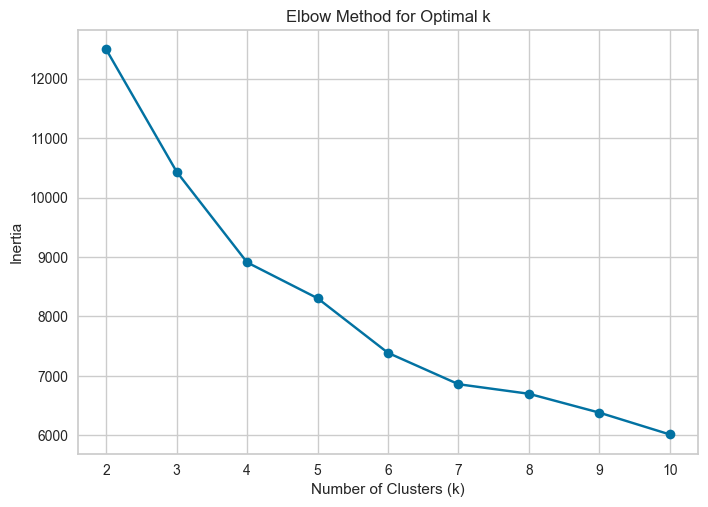

In [387]:
# @title Elbow Method KMeans Clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# TODO: Fit KMeans to original data
k_values = range(2, 11)  # Example: testing k from 2 to 10
inertia = []

# Calculate inertia for each k value
for k in k_values:
    # Initiate KMeans with the current k value
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Fit KMeans for the current k value using 'data' instead of 'df_pca'
    kmeans.fit(data)  

    # Append the inertia for this k value
    inertia.append(kmeans.inertia_)

# Now plot the inertia values to visualize the "elbow" point
plt.plot(k_values, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.xticks(np.arange(2, 11, 1))  # Set x-axis ticks
plt.grid(True)  # Optionally add grid lines
plt.show()


**ANALISIS**

Disini saya menggunakan elbow method untuk menentukan k optimal untuk melakukan cluster, berdasarkan output di dapatkan bahwa k optimal berada pada k 4 atau di k 5

**B. BERDASARKAN SILHOUTTE ANALYSIS**

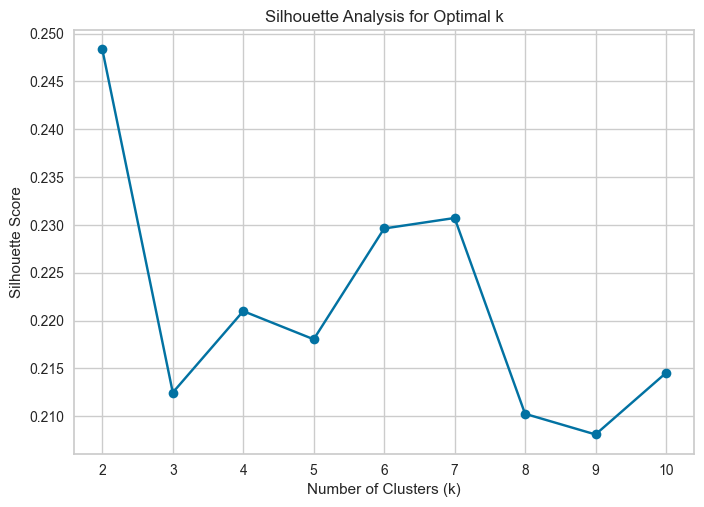

In [388]:
# @title Silhouette Plot KMeans Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Define range of cluster numbers to evaluate
k_range = range(2, 11)  # Example: testing k from 2 to 10

# Store silhouette scores for each k
silhouette_scores = []

# Calculate silhouette score for each k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data)  # Menggunakan 'data' bukan 'df_pca'
    silhouette_scores.append(silhouette_score(data, cluster_labels))

# Plot the silhouette scores
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis for Optimal k")
plt.xticks(np.arange(min(k_range), max(k_range)+1, 1.0))  # Set x-axis ticks
plt.grid(True)  # Optionally add grid lines
plt.show()


**ANALISIS**

selain elbow method di sini saya menggunakan silhoutte score juga untuk mencari niali k yang optimal untuk melakukan cluster pada tahap ini saya melakukan looping k dari renatang 2 hingga 10. Berdasarkan output didapatkan bahwa nilai k=2 memiliki nilai yang paling tinggi, namun jika 2 terlalu sediki bisa menggunakan k=6 dan k-7, karena nilai pada k tersebut juga cukup tinggi dibandingkan dengan yang lain

For n_clusters = 2, The average silhouette_score is: 0.2484
For n_clusters = 3, The average silhouette_score is: 0.2158
For n_clusters = 4, The average silhouette_score is: 0.2210
For n_clusters = 5, The average silhouette_score is: 0.2175
For n_clusters = 6, The average silhouette_score is: 0.2297


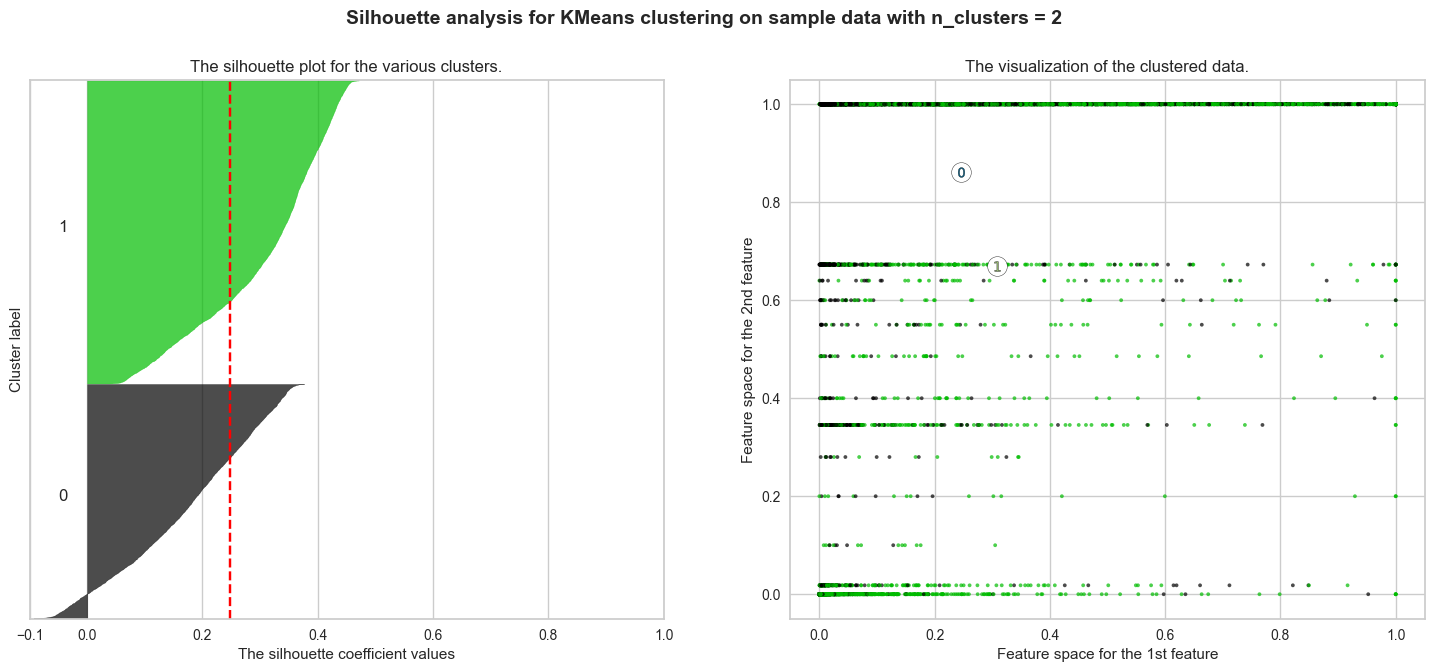

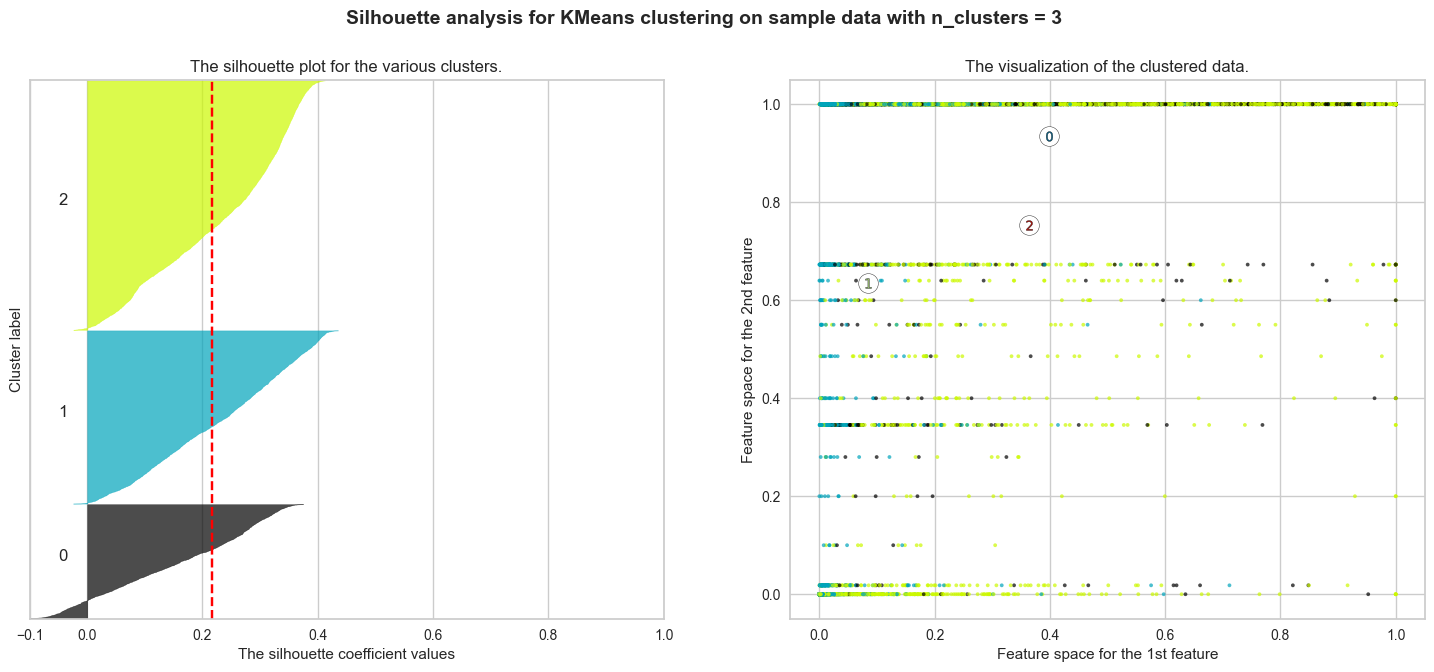

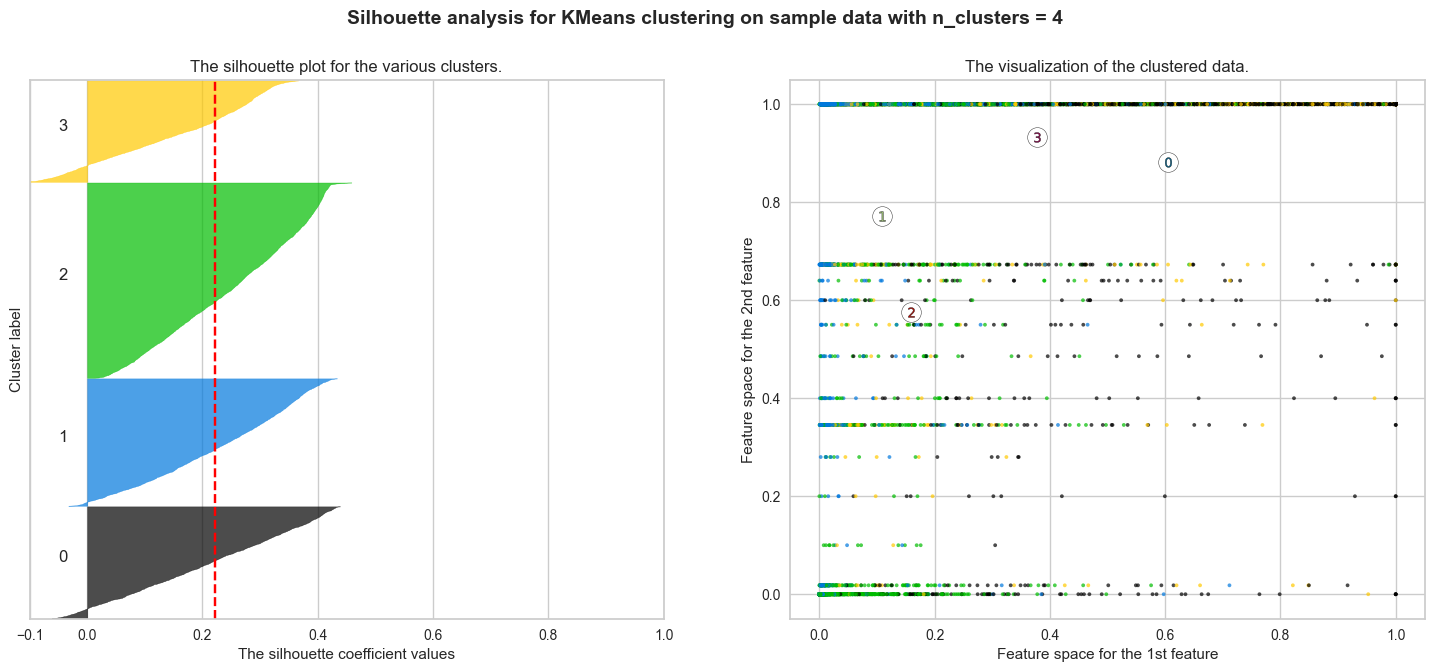

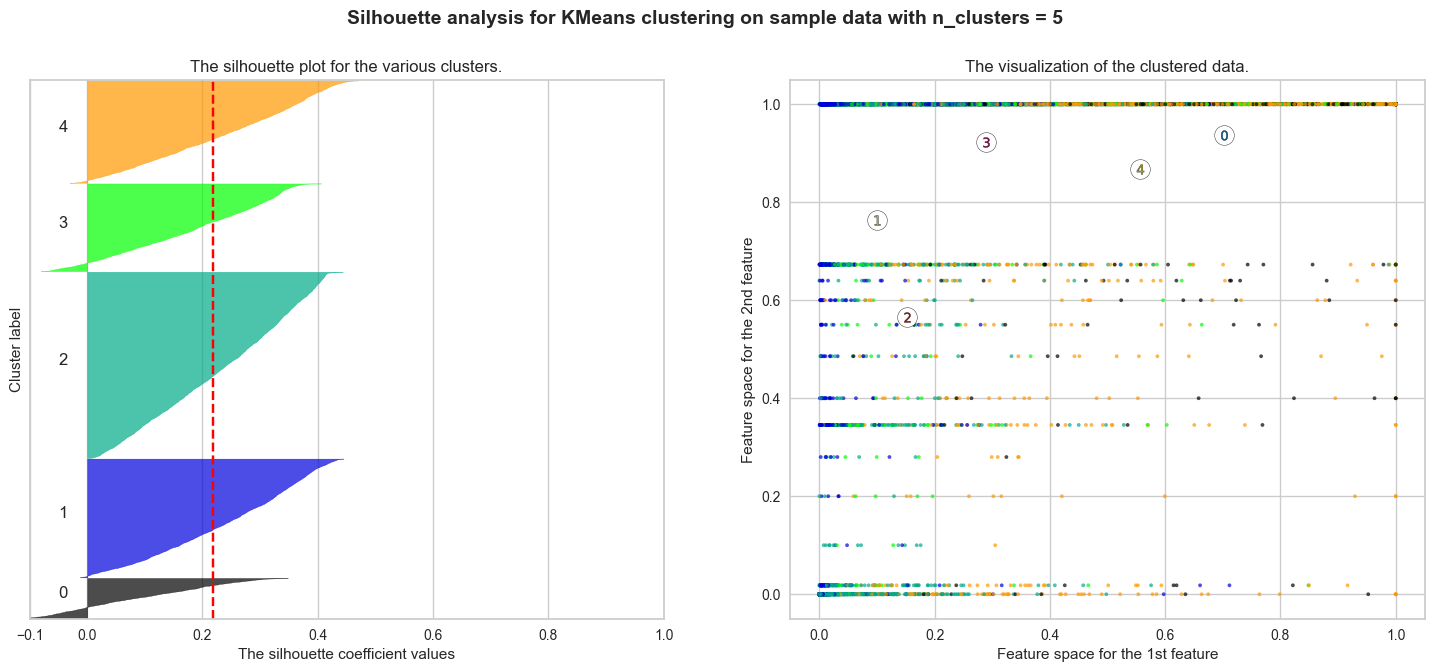

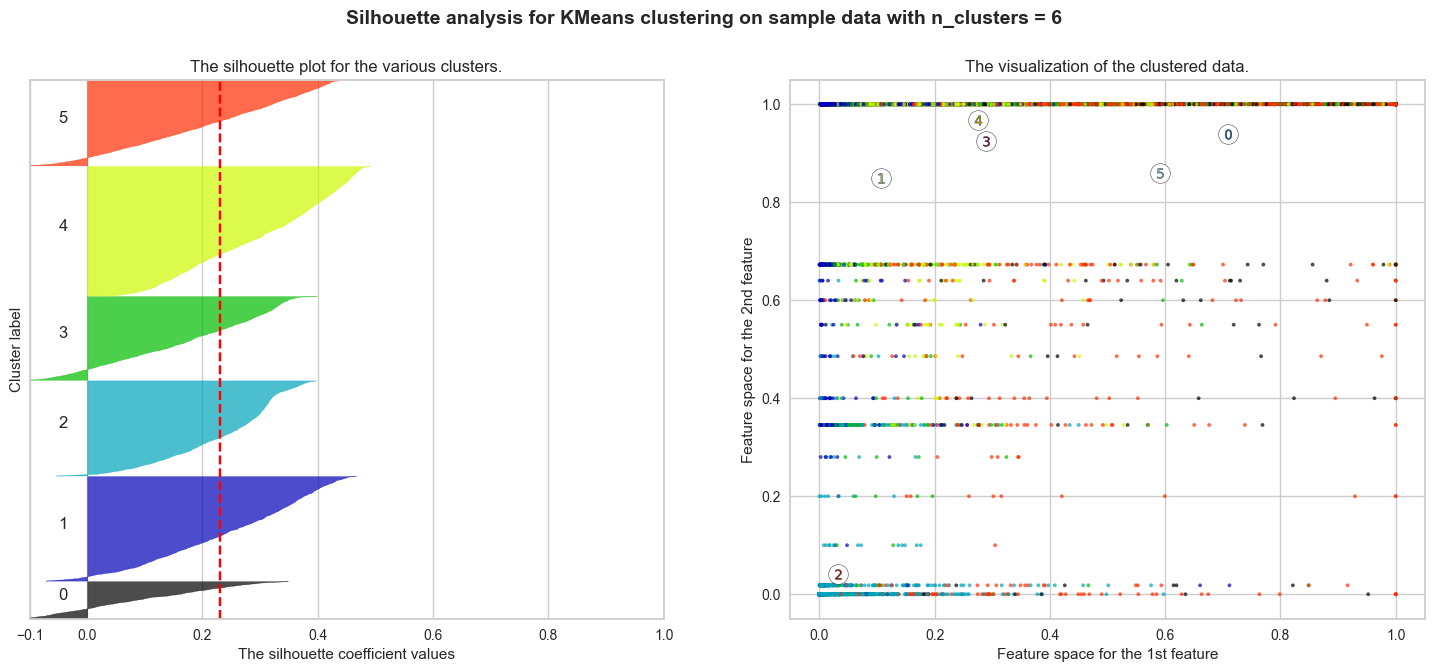

In [389]:
# source: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])  # Menggunakan data, bukan df_pca

    # Initialize KMeans and fit data
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data)  # Menggunakan data

    # Compute silhouette score
    silhouette_avg = silhouette_score(data, cluster_labels)  # Menggunakan data
    print(
        f"For n_clusters = {n_clusters}, The average silhouette_score is: {silhouette_avg:.4f}"
    )

    # Compute silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data, cluster_labels)  # Menggunakan data

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        data.iloc[:, 0], data.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Plot cluster centers
    centers = clusterer.cluster_centers_
    ax2.scatter(
        centers[:, 0], centers[:, 1], marker="o", c="white", alpha=1, s=200, edgecolor="k"
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker=f"${i}$", alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        f"Silhouette analysis for KMeans clustering on sample data with n_clusters = {n_clusters}",
        fontsize=14,
        fontweight="bold",
    )

plt.show()


**ANALISIS**

Pada tahap ini saya melakukan clustering menggunakan k-means dengan jumlah k dari range 2 hingga 6, kemudian mengevaluasi dengan silhoutte scroe. Didapatkan bahwa cluster dari range 2 hingga 6 yang memiliki nilai silhoutte tertinggi yakni k=2 dengan nilai silhoutte 0.2484 berdasarkan gambar yang memiliki  pembagian data paling seimbang dibandinkan yang lain berada pada k=2, walaupun nilai silhoutte ini juga masih sangat kecil

**C. BERDASARKAN GAP STATISTIC**

Optimal k: 8


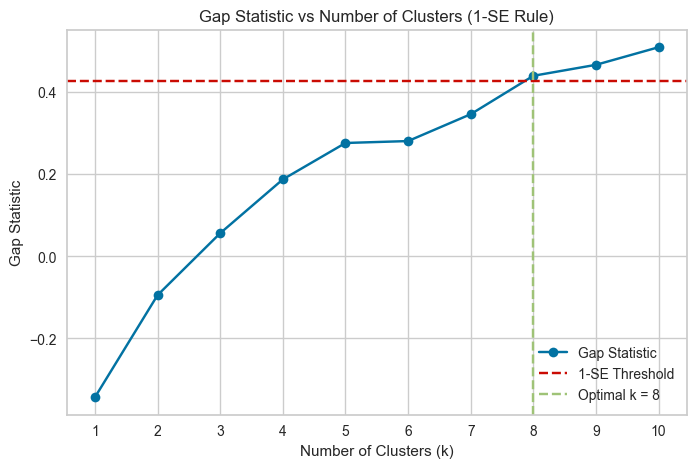

In [390]:
import numpy as np
import matplotlib.pyplot as plt
gap_values = compute_gap_statistic(data, k_max)

# Menghitung standard error dengan benar
standard_error = np.std(gap_values) / np.sqrt(len(gap_values))  # SE dihitung dengan sqrt(n)

# Menentukan nilai maksimum Gap Statistic
max_gap = max(gap_values)

# Menentukan threshold dengan aturan 1-standard error
threshold = max_gap - standard_error

# Menentukan nilai k optimal (nilai k pertama yang tetap dalam threshold)
optimal_k = np.argmax(gap_values) + 1  # Default ke k dengan gap max
for k in range(len(gap_values)):
    if gap_values[k] >= threshold:
        optimal_k = k + 1  # +1 untuk menyesuaikan indeks 0-based
        break

print(f"Optimal k: {optimal_k}")

# Plot Gap Statistic dengan aturan 1-standard error
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(gap_values) + 1), gap_values, marker='o', label='Gap Statistic')
plt.axhline(y=threshold, color='r', linestyle='--', label='1-SE Threshold')
plt.axvline(x=optimal_k, color='g', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.title('Gap Statistic vs Number of Clusters (1-SE Rule)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Gap Statistic')
plt.xticks(range(1, len(gap_values) + 1))
plt.legend()
plt.grid(True)
plt.show()


**ANALISIS**

pada tahap ini saya menghitung gap statistic untuk menentukan jumlah cluster terbaik dalam k-means. Gap Gap Statistic membandingkan inertia (variansi dalam klaster) dari data asli dengan data acak (random). Jika data asli memiliki klaster yang jelas, inertia-nya akan lebih rendah dibandingkan data acak, dan nilai Gap akan lebih besar.

Pada tahap ini mengevaluasi jumlah cluster dari k=1 hingga k=10. Berdasarkan output didapatkan bahwa jumlah k yang optimal berada pada k=8

# **2. CLUSTERING DENGAN DATA PCA**

In [391]:
from sklearn.decomposition import PCA
# Check number dimensions of data
print(f"Data shape: {data.shape}")

Data shape: (8950, 17)


**ANALISIS**

data sebelum dilakukan pca memiliki ukuran 8950,17 yang artinya memiliki 17 dimensi

# 1. PCA

In [392]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)
# Display the new shape and the PCA-transformed data
print(f"New data shape: {data_pca.shape}")
print(data_pca)

New data shape: (8950, 2)
[[-0.56720753 -0.80129208]
 [-0.86519809  0.58413311]
 [ 0.37959887  0.13958742]
 ...
 [ 0.13296587 -0.92474701]
 [-0.68967845 -0.81100792]
 [ 0.14215609 -0.22180707]]


**ANALISIS**

Pada tahap ini saya melakukan reduksi dimensi menggunakan metode PCA dengan mereduksi menjadi 2 dimensi utama

**A. CREATE NEW DATAFRAME WHICH CONSIST PCA**

In [393]:
df_pca = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])
df_pca.head()

PCA1      PCA2
0 -0.567208 -0.801292
1 -0.865198  0.584133
2  0.379599  0.139587
3 -0.290157 -0.297183
4 -0.586107 -0.474745

**ANALISIS**

data hasil pca saya simpan ke variabel baru bernama df_pca

**B. VISUALISASI PCA**

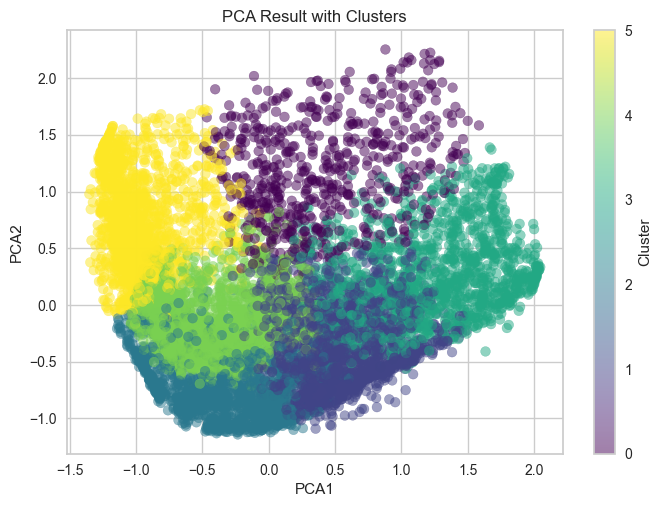

In [394]:
plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.colorbar(label='Cluster')
plt.title('PCA Result with Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()


**ANALISIS**

Pada tahap ini saya memvisualisasikan hasil Principal Component Analysis (PCA) dalam bentuk scatter plot.

# 2. BUILD MODEL CLUSTERING AND EVALUATE

**A. KMEANS**


Cluster Analysis KMeans

SSE (inertia):  3457.388638428245

Silhoutte Score:  0.40076576653326046


Davies-Bouldin Index: 0.8414591343870899


Calinski-Harabasz Score: 8202.210629267913




C:\Users\nimaa\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


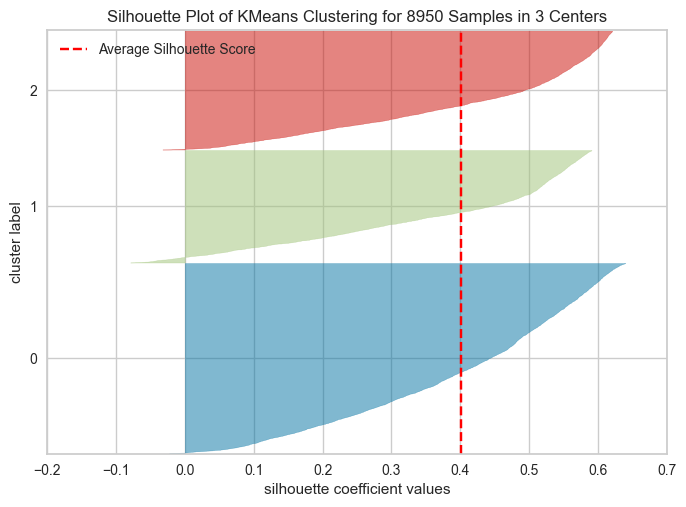

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 8950 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [395]:
#@title Build Model Clustering and Evaluate
kmeans=KMeans(n_clusters=3, init="k-means++", n_init=1)
clusters = kmeans.fit_predict(df_pca)

print('\nCluster Analysis KMeans\n')

# SSE
print('SSE (inertia): ', kmeans.inertia_)

# Silhoutte Score
print('\nSilhoutte Score: ', silhouette_score(df_pca,clusters))
print('\n')

# Davies Bouldin Index
# Get the cluster labels
labels = kmeans.labels_
db_index = davies_bouldin_score(df_pca, labels)
print(f"Davies-Bouldin Index: {db_index}")
print('\n')

# Calinski-Harabasz Score
ch_score = calinski_harabasz_score(df_pca, labels)
print(f"Calinski-Harabasz Score: {ch_score}")
print('\n')

visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick') #hanya bisa di KMeans
visualizer.fit(df_pca)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

**ANALISIS**

Pada tahap ini saya melakukan clustering dengan algortima K-Means dengan data yang telah di lakukan reduksi menggunakan PCA kemudian mengevaluasi, didapatkan bahwa :
1. nilai SSE 3457.38, menunjukkan bahwa total jarak dalam klaster masih cukup besar.
2. nilai Silhouette sebesar 0.4 memiliki nilai yang lebih besar di bandingkan dengan data yang tidak dilakukan PCA
3. nilai Davies-Bouldin Indes sudah berada di bawah 1 yakni 0.841, nilai ini lebih kecil dibandingkan dengan nilai pada data yang belum dilakukan PCA yang menunjukkan data yang telah direduksi dengan PCA menunjukkan klaster cukup terpisah


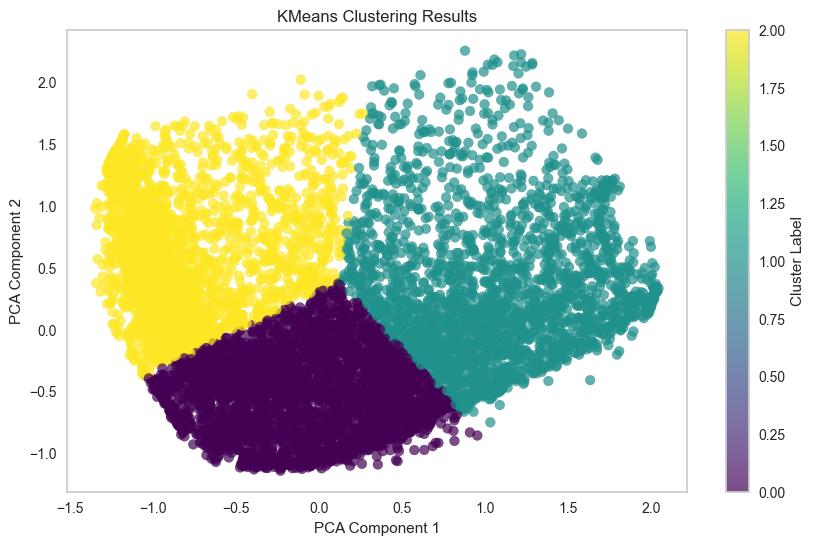

In [396]:
# TODO: Plot the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=clusters, cmap='viridis', alpha=0.7)

# TODO: Create a legend
plt.title('KMeans Clustering Results')
plt.xlabel('PCA Component 1')  # Label for the x-axis
plt.ylabel('PCA Component 2')  # Label for the y-axis
plt.colorbar(scatter, label='Cluster Label')  # Color bar for clusters
plt.grid()  # Add grid for better readability
plt.show()

**ANALISIS**

pada tahap ini saya memvisualisasikan hasil clustering dengan algoritma k-means pada data yang telah di reduksi dengan PCA. Berdasarkan output di dapatkan bahwa Cluster terlihat cukup terpisah, yang menunjukkan bahwa metode clustering berhasil mengelompokkan data ke dalam tiga kelompok yang berbeda.

**B. AGGLOMERATIVE CLUSTERING**

In [397]:
hclust = AgglomerativeClustering(n_clusters = 3, linkage = 'average')
hclusters = hclust.fit_predict(df_pca)
print('\nCluster Analysis\n')

print('\nSilhoutte Score: ', silhouette_score(df_pca,hclusters))
print('\n')

# Davies Bouldin Index
# Get the cluster labels
labels = hclust.labels_
db_index = davies_bouldin_score(df_pca, labels)
print(f"Davies-Bouldin Index: {db_index}")
print('\n')

# Calinski-Harabasz Score
ch_score = calinski_harabasz_score(df_pca, labels)
print(f"Calinski-Harabasz Score: {ch_score}")
print('\n')


Cluster Analysis


Silhoutte Score:  0.3258640228767018


Davies-Bouldin Index: 0.8795346455447871


Calinski-Harabasz Score: 3333.816636964846




**ANALISIS**

Pada tahap ini saya melakukan  menggunakan metode average lingkage  pada data yang telah didreduksi dengan menggunakan PCA. Didapatkan bahwa :
1. nilai Silhouette sebesar 0.33, nilai ini lebih besar dibandingkan dengan data yanng belum di PCA yakni 0.19191638564538524. 

2. nilai Davies-Bouldin Index ini adalah 0.88 nilai ini juga lebih rendah dari pada data yang belum dilakukan PCA

3. nilai Calinski-Harabasz Score ini sangat tinggi yang menunjukkan bahwa model menghasilkan clustering yang cukup baik. Skor yang lebih tinggi menunjukkan bahwa variabilitas antar-cluster jauh lebih besar dibandingkan variabilitas dalam-cluster

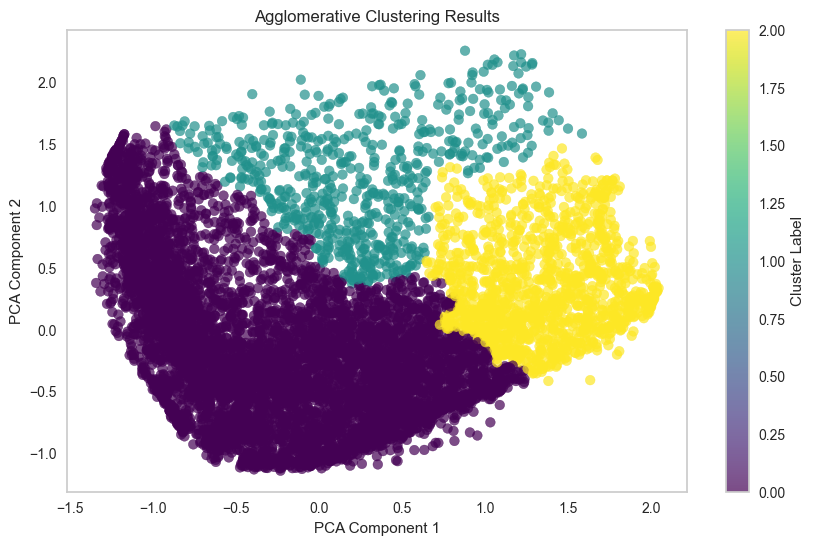

In [398]:
# TODO: Plot the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=hclusters, cmap='viridis', alpha=0.7)

# TODO: Create a legend
plt.title('Agglomerative Clustering Results')
plt.xlabel('PCA Component 1')  # Label for the x-axis
plt.ylabel('PCA Component 2')  # Label for the y-axis
plt.colorbar(scatter, label='Cluster Label')  # Color bar for clusters
plt.grid()  # Add grid for better readability
plt.show()

**ANALISIS**

pada tahap ini saya memvisualisasikan hasil clustering dengan algoritma Agglomerative Clustering pada data yang telah di reduksi dengan PCA. Berdasarkan output di dapatkan bahwa Cluster terlihat cukup terpisah, tetapi ada beberapa titik yang tampak lebih menyebar dibanding hasil K-Means



# 3. MENEMUKAN OPTIMAL NUMBER DI CLUSTERING PADA DATA PCA

**A. BERDASARKAN ELBOW METHOD**

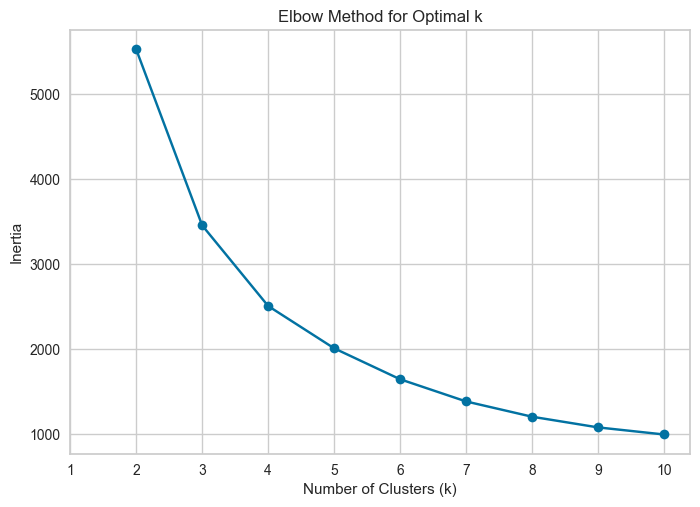

In [399]:
# @title Elbow Method KMeans Clustering
from sklearn.cluster import KMeans

# TODO: Fit kmeans to PCA data
k_values = range(2, 11)  # Example: testing k from 1 to 11
inertia = []

# Calculate inertia for each k value
for k in k_values:
    # Initiate KMeans with the current k value
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Fit KMeans for the current k value
    kmeans.fit(df_pca)  # Fit to the PCA data

    # Append the inertia for this k value
    inertia.append(kmeans.inertia_)

# Now plot the inertia values to visualize the "elbow" point
plt.plot(k_values, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
x_scale = np.arange(1, 11)
x_labels = [str(x) for x in x_scale]
plt.xticks(x_scale, x_labels)
plt.show()

**ANALISIS**

Pada tahap ini saya mencari nilai k yang optimal pada data yang telah di reduksi dengan PCA dalam algoritma K-Means dengan menggunakan elbow method. Didapatkan bahwa inertia menurun drastis dari k=2 hingga k=4,setelah k=4 penurunan mulai melambat. Dapat disimpulkan bahwa k optimal berada pada k=3 atau k=4

**B. BERDASARKAN SILHOUTTE ANAYLIS**

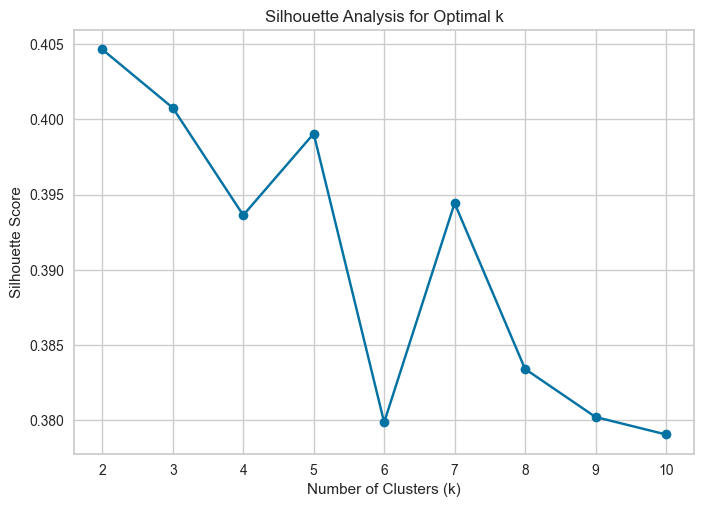

In [400]:
# @title Silhoutte Plot KMeans Clustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Define range of cluster numbers to evaluate
k_range = range(2, 11)  # Example: testing k from 2 to 10

# Store silhouette scores for each k
silhouette_scores = []

# Calculate silhouette score for each k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_pca)
    silhouette_scores.append(silhouette_score(df_pca, cluster_labels))

# Plot the silhouette scores
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis for Optimal k")
plt.xticks(np.arange(min(k_range), max(k_range)+1, 1.0))  # Set x-axis ticks
plt.grid(True)  # Optionally add grid lines
plt.show()

**ANALISIS**

Pada koding ini saya juga mencari nilai k optimal pada clustering k-mean dengan data yang telah direduksi dengan PCA namun kali ini saya menggunakan metode Silhouette Score untuk menentukan jumlah klaster optimal. Didapatkan bahwa nilai silhouette score tertinggi berada di k=2 yakni sebesar 0.405.Setelah itu, nilai menurun dengan fluktuasi, tetapi cenderung lebih rendah untuk k > 5. 

For n_clusters = 2 The average silhouette_score is : 0.4045951694536421
For n_clusters = 3 The average silhouette_score is : 0.40079465296719213
For n_clusters = 4 The average silhouette_score is : 0.39317961345756597
For n_clusters = 5 The average silhouette_score is : 0.39926722190639335
For n_clusters = 6 The average silhouette_score is : 0.37979011776334237


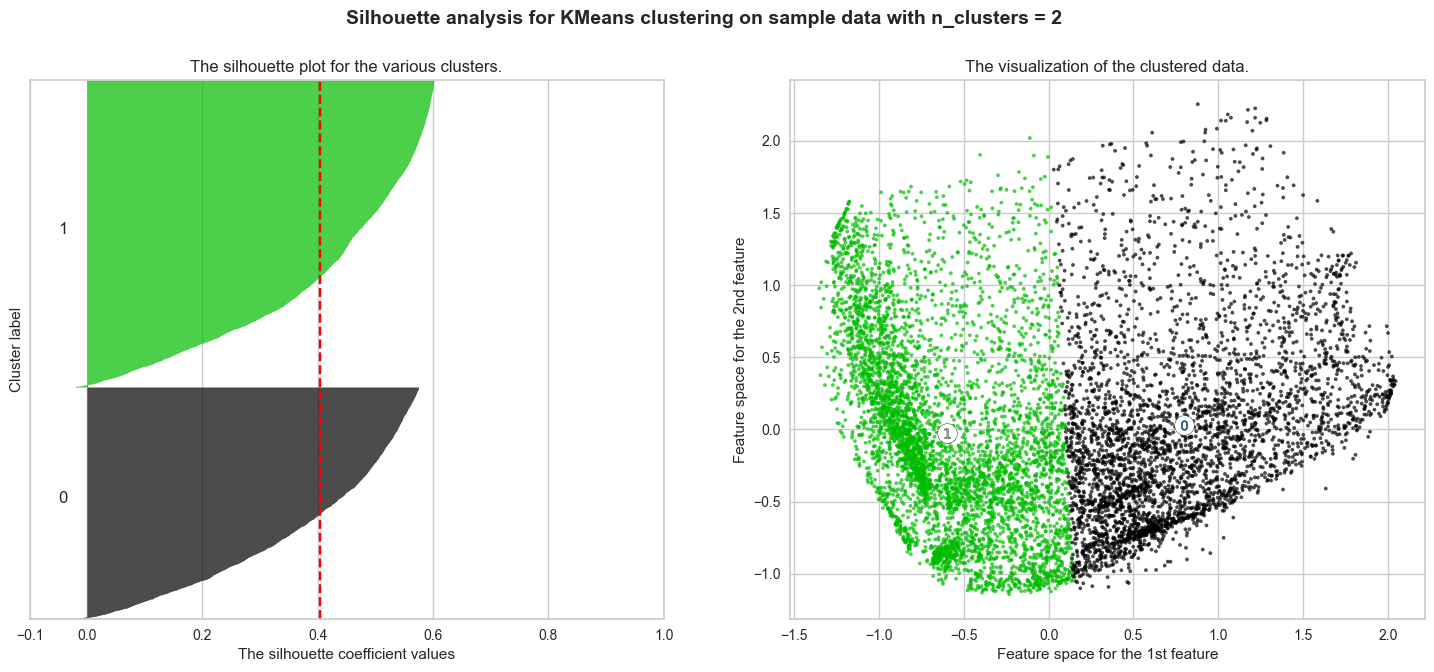

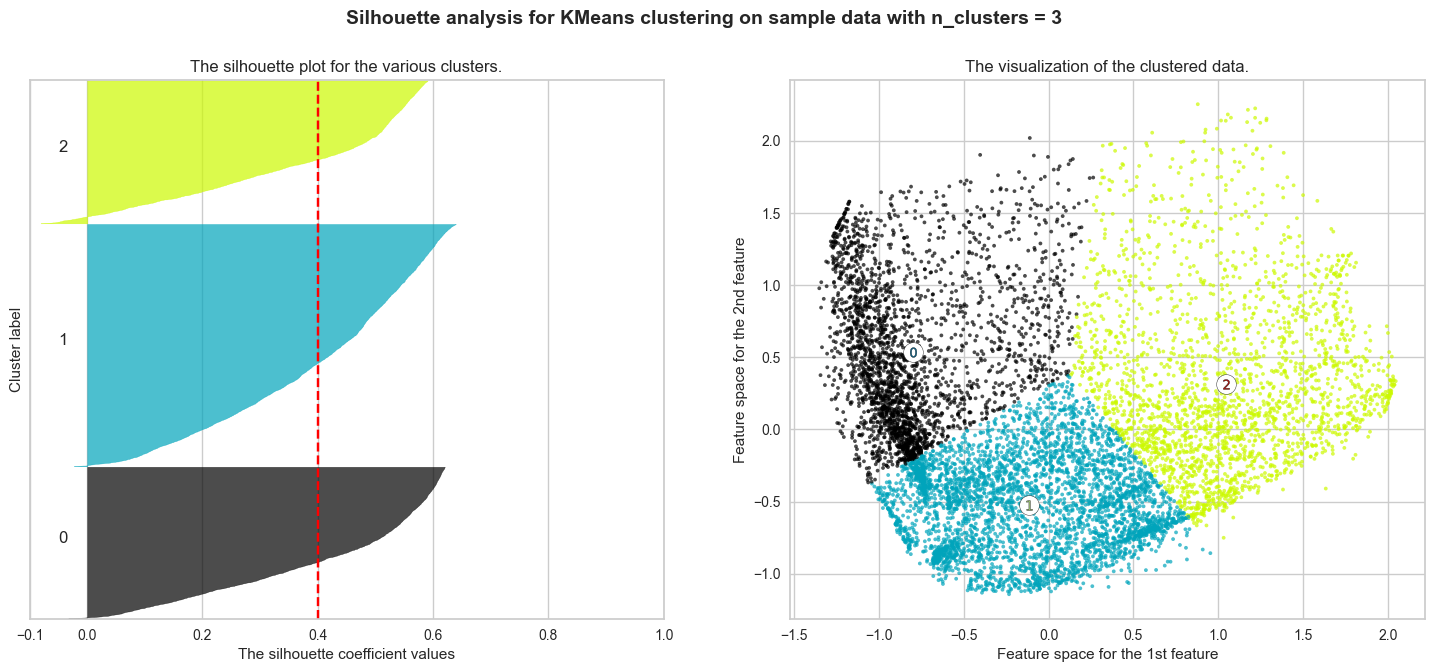

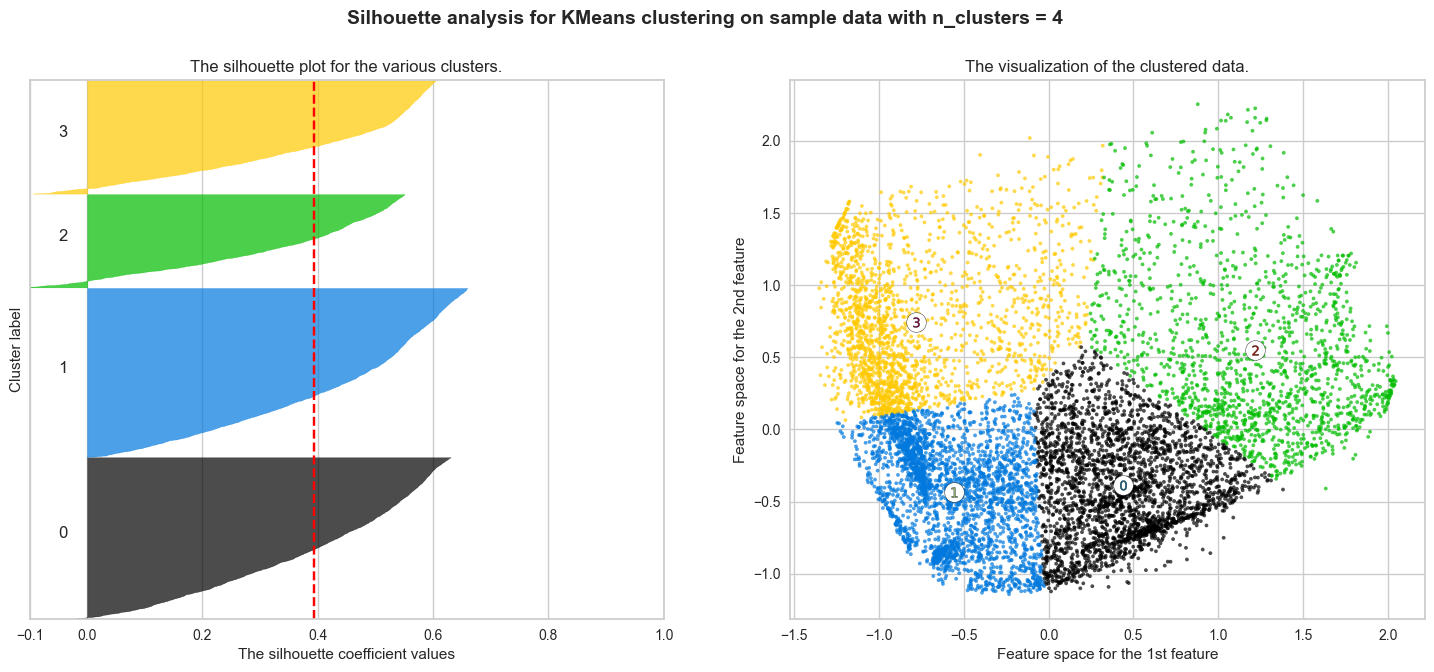

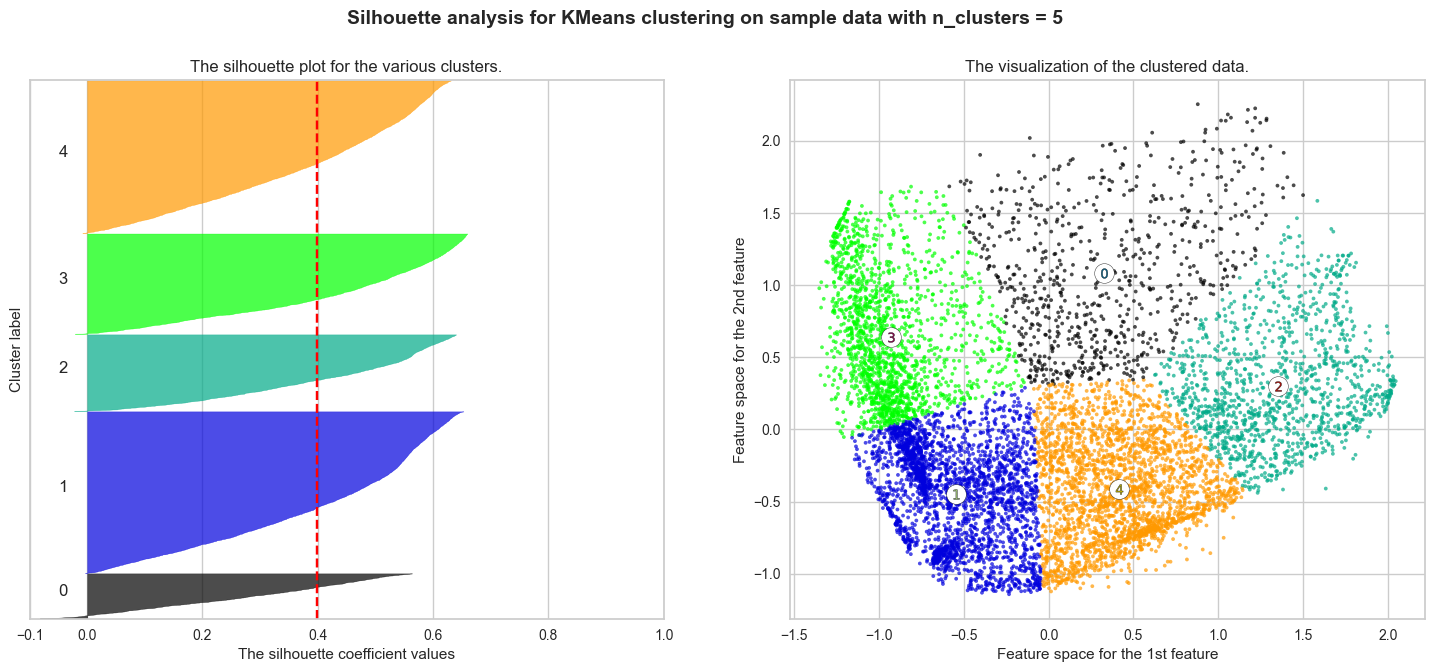

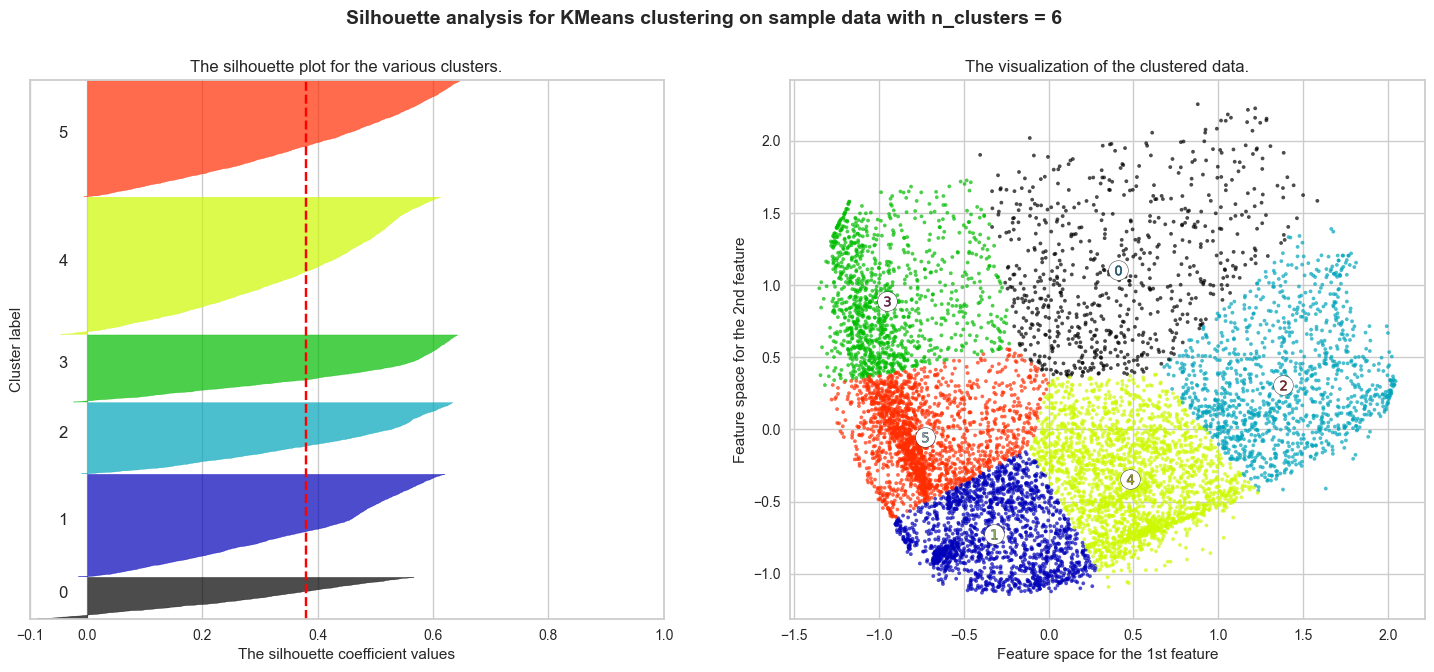

In [401]:
# source: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_pca)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        df_pca.iloc[:, 0], df_pca.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

**ANALISIS**

Disini saya menampilkan plot silhoutte score per cluster untuk melihat seberapa seimbang persebaran data di tiap cluster. Disini juga menampilkan nilai Silhouette Score, dimana semakin tinggi nilai Silhouette Score maka semakin baik. Nilai Silhouette Score tertinggi berada pada k = 2 yakni dengan nilai sebesar  0.4046 nilai ini lebih besar dibandingkan dengan nilai  0.4046  Silhouette pada data yang belum di reduksi menggunakan PCA

**C. BERDASARKAN GAP STATISTIC**

In [402]:
# @title Gap Statistic KMeans Clustering
# Define the Gap Statistic Calculation Function
import numpy as np

def compute_gap_statistic(X, k_max, n_replicates=10):
    """
    Compute the Gap Statistic for a range of cluster numbers.

    Parameters:
    X: array-like, shape (n_samples, n_features)
        The input data.
    k_max: int
        The maximum number of clusters to evaluate.
    n_replicates: int
        The number of bootstrap samples.

    Returns:
    gap_values: list
        The calculated gap values for each k.
    """
    # Generate reference data from a uniform distribution
    def generate_reference_data(X):
        return np.random.uniform(low=X.min(axis=0), high=X.max(axis=0), size=X.shape)

    gap_values = []

    # Loop over a range of k values (1 to k_max)
    for k in range(1, k_max + 1):
        # Fit KMeans to the original data
        from sklearn.cluster import KMeans
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        original_inertia = kmeans.inertia_

        # Compute the average inertia for the reference datasets
        reference_inertia = []
        for _ in range(n_replicates):
            random_data = generate_reference_data(X)
            kmeans.fit(random_data)
            reference_inertia.append(kmeans.inertia_)

        # Calculate the Gap statistic
        gap = np.log(np.mean(reference_inertia)) - np.log(original_inertia)
        gap_values.append(gap)

    return gap_values

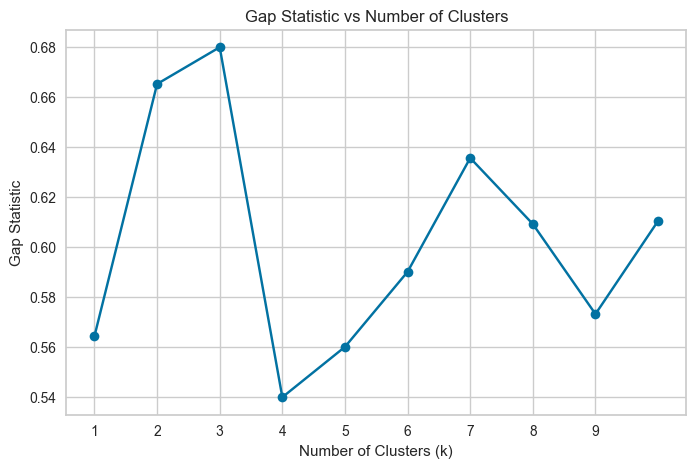

In [403]:
# Calculate Gap Statistic for Different k Values
k_max = 10  # Maximum number of clusters to evaluate
gap_values = compute_gap_statistic(df_pca, k_max)

# Plotting the Gap Statistic
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(range(1, k_max + 1), gap_values, marker='o')
plt.title('Gap Statistic vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Gap Statistic')
x_scale = np.arange(1, 10)
x_labels = [str(x) for x in x_scale]
plt.xticks(x_scale, x_labels)
plt.grid(True)
plt.show()

**ANALISIS**

Pada tahap ini saya menentukan jumlah klaster optimal menggunakan Gap Statistic. Gap Statistic membandingkan inertia (seberapa baik data dikelompokkan) dari clustering data asli dengan clustering data acak. Berdasarkan output nilai gap statistic tertinggi berada pada k=3

In [404]:
# Determine Optimal k
# Calculate standard errors
standard_errors = np.std(gap_values)

# Find optimal k using 1-standard error rule
optimal_k = np.argmax(gap_values) + 1  # +1 to adjust for 0-based indexing
for k in range(1, k_max):
    if gap_values[k] >= gap_values[optimal_k - 1] - standard_errors:
        optimal_k = k + 1  # +1 to adjust for 0-based indexing
        break

print(f"Optimal k: {optimal_k}")

Optimal k: 2


**ANALISIS**

k optimal yang didapatkan yakni k=2,hal ini sedikit berbeda dengan outptu grafik sebelumnya,hal ini disebabkan karena program  hanya mencari nilai maksimum global tanpa mempertimbangkan aturan 1-standar error dengan benar

# **KESIMPULAN**

**Hasil clustering dengan data sebelum di reduksi dengan pca**

1. Hasil clustering dengan algoritma k-means  engan data sebelum di reduksi dengan pcadidapatkan hasil :

SSE (Inertia): 10400.543616658135

Silhouette Score: 0.21565782591505175
Davies-Bouldin Index: 1.520421995423682
Calinski-Harabasz Score: 2761.4437418511357

2. Hasil clustering dengan algortima average linkage engan data sebelum di reduksi dengan pca didapatkan hasil : 

Cluster Analysis


Silhoutte Score:  0.19191638564538524


Davies-Bouldin Index: 1.2680534419690712


Calinski-Harabasz Score: 1011.5695624888373

3. menemukan k optimal dengan elbow methode dengan algoritma k-means dengan data sebelum di reduksi dengan pca. didapatkan hasil : 


k  optimal berada pada k4 atau k=5

4. menemukan k optimal dengan silhouette score methode dengan algoritma k-means dengan data sebelum di reduksi dengan pca. didapatkan hasil : 

bahwa nilai k=2 memiliki nilai yang paling tinggi, namun jika 2 terlalu sediki bisa menggunakan k=6 dan k-7, karena nilai pada k tersebut juga cukup tinggi dibandingkan dengan yang lain

5. menemukan k optimal dengan silhouette score methode dengan algoritma k-means dengan range k 2 hingga 6 dengan data sebelum di reduksi dengan pca. didapatkan hasil :
For n_clusters = 2, The average silhouette_score is: 0.2484
For n_clusters = 3, The average silhouette_score is: 0.2158
For n_clusters = 4, The average silhouette_score is: 0.2210
For n_clusters = 5, The average silhouette_score is: 0.2175
For n_clusters = 6, The average silhouette_score is: 0.2297

6.  menemukan k optimal dengan gap statistic methode  dengan dengan data sebelum di reduksi dengan pca. didapatkan hasil :

optimal k=8


**Hasil clustering dengan data setelah di reduksi dengan pca menjadi 2 komponen utama**


1. Hasil clustering dengan algoritma k-means  dengan data sesudah  di reduksi dengan pca menjadi 2 komponen utama  didapatkan hasil :

Cluster Analysis KMeans

SSE (inertia):  3457.388638428245

Silhoutte Score:  0.40076576653326046


Davies-Bouldin Index: 0.8414591343870899


Calinski-Harabasz Score: 8202.210629267913

2. Hasil clustering dengan algortima average linkage dengan data sesudah  di reduksi dengan pca menjadi 2 komponen utama  didapatkan hasil :

Cluster Analysis


Silhoutte Score:  0.3258640228767018


Davies-Bouldin Index: 0.8795346455447871


Calinski-Harabasz Score: 3333.816636964846


3. menemukan k optimal dengan elbow methode dengan algoritma k-means dengan data  sesudah  di reduksi dengan pca menjadi 2 komponen utama  didapatkan hasil :
 Didapatkan bahwa inertia menurun drastis dari k=2 hingga k=4,setelah k=4 penurunan mulai melambat. Dapat disimpulkan bahwa k optimal berada pada k=3 atau k=4

4. menemukan k optimal dengan silhouette score methode dengan algoritma k-means dengan data  sesudah  di reduksi dengan pca menjadi 2 komponen utama  didapatkan hasil :

 nilai silhouette score tertinggi berada di k=2 yakni sebesar 0.405.Setelah itu, nilai menurun dengan fluktuasi, tetapi cenderung lebih rendah untuk k > 5. 

5. menemukan k optimal dengan silhouette score methode dengan algoritma k-means dengan range k 2 hingga 6 dengan data sesudah  di reduksi dengan pca menjadi 2 komponen utama  didapatkan hasil :

For n_clusters = 2 The average silhouette_score is : 0.4045951694536421
For n_clusters = 3 The average silhouette_score is : 0.40079465296719213
For n_clusters = 4 The average silhouette_score is : 0.39317961345756597
For n_clusters = 5 The average silhouette_score is : 0.39926722190639335
For n_clusters = 6 The average silhouette_score is : 0.37979011776334237

6. menemukan k optimal dengan gap statistic methode  dengan dengan data  sesudah  di reduksi dengan pca menjadi 2 komponen utama  didapatkan hasil :

Optimal k: 2


**DAPAT DISIMPULKAN BAHWA**

 Reduksi PCA meningkatkan kualitas clustering, terlihat dari peningkatan Silhouette Score dan Calinski-Harabasz Score, serta penurunan Davies-Bouldin Index dan SSE. Sebelum PCA, metode optimal k bervariasi, tetapi k = 4 atau k = 5 sering muncul sebagai pilihan terbaik. Setelah PCA, metode konsisten menunjukkan k = 2 sebagai optimal, dengan beberapa metode juga mempertimbangkan k = 3 atau k = 4. PCA membantu menyederhanakan struktur data, membuat pemilihan klaster lebih jelas dan meningkatkan pemisahan antar-klaster.



